## 1. Imports

In [85]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [86]:
# load pickle
content_topics_raw = pd.read_csv('03_final/speech_content_topics.csv')
content_topics_raw.head()

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date,topic
0,0,731990,17,14,Norbert,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,die sitzung ist eröffnet\n\nliebe kolleginnen und kollegen ich begrüße sie alle\nherzlich zur ersten plenarsitzung des deutschen bundestages im neuen jahr da es gute wünsche kaum zu viel\ngeben kann nutze ich gerne die gelegenheit ihnen allen\npersönlich und uns gemeinsam ein gutes und erfolgreiches neues jahr zu wünschen\n\nder kollege franz müntefering hat am vergangenen\nsamstag seinen 70 geburtstag gefeiert\n\n0\n\nund einige tage zuvor haben die kollegin dr christel\nhappachkasan und der kollege willi zylajew runde\ngeburtstage gefeiert im namen des hauses ihnen alle\nguten wünsche für das neue lebensjahr\n\n1\n\nbevor wir in unsere vereinbarte ausgedruckte tagesordnung eintreten haben wir einen geschäftsordnungsantrag zu behandeln die fraktion bündnis 90die grünen hat fristgerecht beantragt die heutige tagesordnung\num die beratung ihres antrags mit dem titel umsatzsteuerermäßigung für hotellerie zurücknehmen zu erweitern\n\n2\n\nzur geschäftsordnung erteile ich das wort dem kollegen volker beck\n\n,2010-01-18 22:00:00,Arbeit
1,1,731991,17,14,Volker,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Beck,4,Member of Parliament,NaN,11002625,herr präsident meine damen und herren wir beantragen unseren antrag umsatzsteuerermäßigung für\nhotellerie zurücknehmen zusammen mit dem einzelplan des bundesministeriums der finanzen hier heute zu\nberaten als wir die tagesordnung für diese woche\nvereinbart haben war das wachstumsbeschleunigungsgesetz noch nicht verabschiedet und waren die hintergründe und konsequenzen des wachstumsbeschleunigungsgesetzes noch nicht in vollem umfang bekannt\n\nnach ihrem finanzplan geht es um ein volumen von\n1 milliarde euro jährlich nach meinung der experten in\nder sachverständigenanhörung um 2 milliarden euro\nangesichts der dramatischen haushaltssituation ist es\nnotwendig eine korrektur anzubringen die noch im\nbundeshaushalt 2010 berücksichtigung finden kann\ndeshalb ist die heutige beratung unseres antrages im\nzusammenhang mit dem bundeshaushalt dringend erforderlich\n\n0\n\nsie mögen jetzt einwenden kollege kauder hat es\nmir gerade auf meinem weg zum rednerpult hinterhergerufen es geht um den haushalt natürlich ist das\neine haushaltsrelevante und eng im zusammenhang mit\ndem bundeshaushalt stehende frage aber ich möchte\ndaran erinnern in ihrer letzten koalition herr kauder\nhaben sie in ersten lesungen des bundeshaushaltes immer wieder anträge zugelassen die noch nicht einmal\nim zusammenhang mit dem bundeshaushalt standen\nich erinnere an das erneuerbareenergiengesetz 2007\nden antrag der koalition die weltweit letzten\n100 westpazifischen grauwale schützen\n\n1\n\nund an 2006 wo es um belarus nach den präsidentschaftswahlen ging meine damen und herren lassen\nsie diesen antrag heute zu\n\n2\n\ndie umsatzsteuersenkung für hotellerie ist klientelpolitik reinsten wassers\n\n3\nredetext\n\n\nvolker beck 4\nsie verfehlt das angebliche ziel der koalition steuervereinfachungen durchzuführen die wirtschaftsverbände acht große verbände haben ihnen diese woche\neinen brief geschrieben in welchem sie eine korrektur\ndieser regelung verlangen denn diese regelung führt\nbei den betrieben zu mehr bürokratie der aufwand für\nreisekostenabrechnungen wird steigen ein teil der\nkosten nämlich die frühstücksregelung wird in zukunft lohnsteuerpflichtig werden\n\n5\n\n,2010-01-18 22:00:00,Außenpolitik: Naher Osten
2,2,731992,17,14,Norbert,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,herr kollege beck\n\n,2010-01-18 22:00:00,No Topic
3,3,731993,17,14,Volker,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Beck,4,Member of Parliament,NaN,11002625,all diese fragen zeigen dass

In [87]:
#content_df_raw = pd.read_pickle('content_df_features.pkl')
content_df_raw = pd.read_csv('content_df_features.csv')
content_df_raw.tail()

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure
934344,934344,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,...,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen Pohl, Gerrit Huy, weiterer Abgeordneter und der Fraktion der AfD: Brot, Bett und Seife – Sachleistungen statt Geldleistungen für Asylbewerber Drucksache Nächste Sitzung","Sehr geehrte Frau Präsidentin! Meine Damen und Herren! Kein anderes Land setzt solche Anreize für illegale Migration wie Deutschland. Denn hier öffnet sich ein Füllhorn, von dem zu Hause nur geträumt wird. Der Antrag, die Versorgung auf eine Grundversorgung in Form von Sachleistungen zu reduzieren, ist deshalb richtig, wichtig und dringlich. Es gibt kein Menschenrecht auf den Erhalt deutscher Steuergelder, um diese an den Schleuser, die Familie oder auch mal an den IS weiterzuleiten. Die griffige Formel „Brot, Bett und Seife“ bringt dies plakativ auf den Punkt. Schon 2019 hat der EuGH das Vorliegen einer unmenschlichen oder erniedrigenden Behandlung im Sinne von Artikel 4 Grundrechtecharta als eine Situation beschrieben, in der eine Person nicht mehr in der Lage ist, ihre elementarsten Bedürfnisse zu befriedigen, und hierdurch in ihrer Gesundheit beeinträchtigt oder in einen Zustand der Verelendung versetzt wird. Diese Grundbedürfnisse hat das Gericht ausdrücklich beschrieben mit „sich zu ernähren, sich zu waschen und eine Unterkunft zu finden“. Jeder kann es nachlesen. Eine Basisversorgung geht also sehr wohl konform mit der Menschenwürde. Eine Einschränkung der Leistungen ist aber nur ein ganz kleiner Baustein, nicht die Lösung der Migrationskrise. Das geht nur über Grenzschutz, Abschiebungen und Remigration. Über die Festung Europa und die Festung Deutschland. Mit Brandmauern und einer Ablehnung der Zusammenarbeit mit der AfD, liebe Union, lässt sich nichts von all dem umsetzen. Was man von der Migrationskritik der Union in Wahrheit zu halten hat, beweist heute Abend Herr Merz, der auf dem CDU-Empfang zum Geburtstag von Frau Merkel eine Laudatio auf Frau Merkel halten wird oder jetzt schon gehalten hat, anstatt sie für ihre Verbrechen am deutschen Volk zu verdammen.",2024-09-25,AfD,2024,1799,57.0,männlich,6.594521
934345,934345,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen Pohl, Gerrit Huy, weiterer Abgeordneter und der Fraktion der AfD: Brot, Bett und Seife – Sachleistungen statt Geldleistungen für Asylbewerber Drucksache Nächste Sitzung",Herr Abgeordneter.,2024-09-25,DIE LINKE.,2024,18,61.0,weiblich,25.887671
934346,934346,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,...,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen Pohl, Gerrit Huy, weiterer Abgeordneter und der Fraktion der AfD: Brot, Bett und Seife – Sachleistungen statt Geldleistungen für Asylbewerber Drucksache Nächste Sitzung",Vielen Dank.,2024-09-25,Fraktionslos,2024,12,57.0,männlich,6.594521
934347,934347,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen Pohl, Gerrit Huy, weiterer Abgeordneter und der Fraktion der AfD: Brot, Bett und Seife – Sachleistungen statt Geldleistungen für Asylbewerber Drucksache Nächste Sitzung",Für die SPD-Fraktion hat die Kollegin Angelika Glöckner das Wort.,2024-09-25,DIE LINKE.,2024,65,61.0,weiblich,25.887671
934348,934348,1075926,20,187,angelika,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,glöckner,25,Member of Parliament,NaN,...,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen Pohl, Gerrit Huy, weite

In [88]:
contributions_raw = pd.read_pickle('contributions_df.pkl')
contributions_raw.head()

,text_position,content,speech_id
0,0,(Nellen),1
0,1,"(Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksachen, Umdruck Nrn. 490, 515; Änderungsanträge Umdrucke Nrn. 516, 517, 518, 519, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550)",2
1,0,(Drucksache Nr. 3308),2
0,1,(Zurufe: Wiederholen!),4
1,0,(Zurufe: Sofort!),4


In [89]:
politicians_raw = pd.read_pickle('politicians_df.pkl')
politicians_raw.head()

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name
0,11000001,5,5,manfred,abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsprofessor",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union
1,11000001,6,5,manfred,abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsprofessor",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union
2,11000001,7,5,manfred,abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsprofessor",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union
3,11000001,8,5,manfred,abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsprofessor",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union
4,11000001,9,5,manfred,abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsprofessor",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union


In [90]:
factions_raw = pd.read_pickle('03_final/factions.pkl')
factions_raw.head()

,id,abbreviation,faction_name
0,0,AfD,Fraktion Alternative für Deutschland
1,2,BP,Fraktion Bayernpartei
2,4,Bündnis 90/Die Grünen,Fraktion BÜNDNIS 90/DIE GRÜNEN
3,7,DIE LINKE.,Fraktion DIE LINKE.
4,9,DP/DPB,Fraktion DP/DPB (Gast)


In [91]:
cities_raw = pd.read_excel('German_cities.xlsx', )
cities_raw.head()

,Stadt
0,Berlin
1,Hamburg
2,München
3,Köln
4,Frankfurt am Main


## 2. Categorization of Structure

### 2.1 Cateogization based on Agenda Poinnts

In [92]:
'''# download all unique top_title to examine in excel
unique_top_title = content_df['top_title'].unique()
unique_top_title = pd.DataFrame(unique_top_title)
unique_top_title.to_excel('03_final/unique_top_title.xlsx')
# get all unique top_title'''

"# download all unique top_title to examine in excel\nunique_top_title = content_df['top_title'].unique()\nunique_top_title = pd.DataFrame(unique_top_title)\nunique_top_title.to_excel('03_final/unique_top_title.xlsx')\n# get all unique top_title"

In [93]:
#filter for electoral terms 18, 29, 20
content_subset = content_df_raw[content_df_raw['electoral_term'].isin([17, 18, 19, 20])]
content_subset

# change all nan values to ''
content_subset = content_subset.fillna('')


In [94]:
# Show all lines where top_title is not classified
len(content_subset[content_subset['top_title'] == ''])


27336

In [95]:
# Dictionary to categorize texts based on keywords
keyword_categories = {
    "Wahl": "Organizational",
    "Festlegung": "Organizational",
    "Beschlussfassung": "Organizational",
    "Amtsübernahme": "Organizational",
    "Eidesleistung": "Organizational",
    "Ausschussüberweisung": "Organizational",

    "Regierungserklärung": "Government Statement",
    "Abgabe einer Erklärung": "Statement",
    "Erklärung durch den Bundeskanzler": "Statement",
    "Erklärung durch die Bundeskanzlerin": "Statement",
    "Unterrichtung durch die Bundesregierung": "Government Briefing",
    "Unterrichtung durch die Bundesregie-rung": "Government Briefing",
    "Erklärung nach § 31 GO": "Statement under § 31 Rules",
    "Erklärungen nach § 31 GO": "Statement under § 31 Rules",

    "Aktuelle Stunde": "Aktuelle Stunde",
    "Debatte": "Debate",
    "Große Anfrage": "Major Inquiry",

    "Befragung": "Questioning",
    "Fragestunde": "Questioning",

    "Beschlussempfehlung": "Recommendation for Resolution",

    "Bericht des Petitionsausschusses": "Report",
    "Bericht des Rechtsausschusses": "Report",
}

keyword_categories_2 = {
    "Bericht": "Report",
    "Antrag": "Request",
    "Beratung": "Debate",
    "Unterrichtung durch": "Briefing",
}


# Function to classify based on primary and secondary categories
def classify_top_title(text):
    # Limit to the first 100 characters
    text_snippet = text[:100].lower()
    
    # First attempt to classify with primary keyword categories
    for keyword, category in keyword_categories.items():
        if keyword.lower() in text_snippet:
            return category
    
    # If no match is found, attempt to classify with secondary keyword categories
    for keyword, category in keyword_categories_2.items():
        if keyword.lower() in text_snippet:
            return category

    # Default if no keywords are matched
    return "Other"

# Apply classification to the 'top_title' column
content_subset['sub_category'] = content_subset['top_title'].apply(classify_top_title)

# Display the first few rows with the new 'category' column
content_subset.head()

Unnamed: 0      id  electoral_term  session first_name  \
697874      697874  729470              17        1      heinz   
697875      697875  729471              17        1     volker   
697876      697876  729472              17        1      heinz   
697877      697877  729473              17        1      heinz   
697878      697878  729474              17        1    norbert   

                                             document_url    last_name  \
697874  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
697875  https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
697876  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
697877  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
697878  https://dip21.bundestag.de/dip21/btp/17/17001.pdf      lammert   

        faction_id           position_short    position_long  ...  \
697874           5  Presidium of Parliament  alterspräsident  ...   
697875           5     Member of Parliament                   ...   
697876           5  Presidium of Parliament  alterspräsident  ...   
697877           5  Presidium of Parliament  alterspräsident  ...   
697878           5     Member of Parliament                   ...   

                                                                                                                                                                                                                                     top_title  \
697874                                                                                                                                                                                                                                           
697875  Wahl des Präsidenten, verbunden mit Namensaufruf und Feststellung der Beschlussfähigkeit . . . . . . . . . . . . . . . . . . . .  Volker Kauder (CDU/CSU) . . . . . . . . . . . . . .  Alterspräsident Dr. Heinz Riesenhuber . . . . .   
697876  Wahl des Präsidenten, verbunden mit Namensaufruf und Feststellung der Beschlussfähigkeit . . . . . . . . . . . . . . . . . . . .  Volker Kauder (CDU/CSU) . . . . . . . . . . . . . .  Alterspräsident Dr. Heinz Riesenhuber . . . . .   
697877  Wahl des Präsidenten, verbunden mit Namensaufruf und Feststellung der Beschlussfähigkeit . . . . . . . . . . . . . . . . . . . .  Volker Kauder (CDU/CSU) . . . . . . . . . . . . . .  Alterspräsident Dr. Heinz Riesenhuber . . . . .   
697878  Wahl des Präsidenten, verbunden mit Namensaufruf und Feststellung der Beschlussfähigkeit . . . . . . . . . . . . . . . . . . . .  Volker Kauder (CDU/CSU) . . . . . . . . . . . . . .  Alterspräsident Dr. Heinz Riesenhuber . . . . .   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [96]:
'''#download excel with unique top title and category other
content_subset_other = content_subset[content_subset['sub_category']=="Other"]
# filter for unique top_title
content_subset_other = content_subset_other.drop_duplicates(subset=['top_title'])
content_subset_other.to_excel('content_subset_other.xlsx')'''

'#download excel with unique top title and category other\ncontent_subset_other = content_subset[content_subset[\'sub_category\']=="Other"]\n# filter for unique top_title\ncontent_subset_other = content_subset_other.drop_duplicates(subset=[\'top_title\'])\ncontent_subset_other.to_excel(\'content_subset_other.xlsx\')'

In [97]:
# classify the sub_category into main_category
main_categories = {
    "Organizational": "Organizational",
    "Government Statement": "Statement",
    "Statement": "Statement",
    "Government Briefing": "Debate",
    "Statement under § 31 Rules": "Debate",
    "Aktuelle Stunde": "Debate",
    "Debate": "Debate",
    "Major Inquiry": "Debate",
    "Questioning": "Questioning",
    "Recommendation for Resolution": "Debate",
    "Report": "Debate",
    "Request": "Debate",
    "Debate": "Debate",
    "Briefing": "Debate",
    "Other": "Other",
}

# Function to classify based on primary and secondary categories
def classify_main_category(text):
    return main_categories[text]

# Apply classification to the 'sub_category' column
content_subset['main_category'] = content_subset['sub_category'].apply(classify_main_category)

# Display the first few rows with the new 'category' column
content_subset.head()

Unnamed: 0      id  electoral_term  session first_name  \
697874      697874  729470              17        1      heinz   
697875      697875  729471              17        1     volker   
697876      697876  729472              17        1      heinz   
697877      697877  729473              17        1      heinz   
697878      697878  729474              17        1    norbert   

                                             document_url    last_name  \
697874  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
697875  https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
697876  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
697877  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
697878  https://dip21.bundestag.de/dip21/btp/17/17001.pdf      lammert   

        faction_id           position_short    position_long  ...  \
697874           5  Presidium of Parliament  alterspräsident  ...   
697875           5     Member of Parliament                   ...   
697876           5  Presidium of Parliament  alterspräsident  ...   
697877           5  Presidium of Parliament  alterspräsident  ...   
697878           5     Member of Parliament                   ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [98]:
# count main categories
content_subset['main_category'].value_counts()


Debate            138744
Questioning        47090
Other              37417
Organizational      6685
Statement           6539
Name: main_category, dtype: int64

In [99]:
# get a sample of 10 complete sessions to verify
'''content_subset['session'].unique()
content_subset['session'].value_counts()
sample_sessions = content_subset['session'].sample(10, random_state=42)
sample_sessions

# download sample sessions
content_df_sample = content_subset[content_subset['session'].isin(sample_sessions)]
content_df_sample.to_excel('content_df_sample.xlsx')
'''

"content_subset['session'].unique()\ncontent_subset['session'].value_counts()\nsample_sessions = content_subset['session'].sample(10, random_state=42)\nsample_sessions\n\n# download sample sessions\ncontent_df_sample = content_subset[content_subset['session'].isin(sample_sessions)]\ncontent_df_sample.to_excel('content_df_sample.xlsx')\n"

### 2.2 Categorization based on content

In [100]:
new_tagesorgnungspunkt_length_threshold = 250

# Identify first entries in each session
first_entries = content_subset.groupby(['electoral_term', 'session']).head(1).index

# Create a new_tagesordnungspunkt column with different length conditions for first and other entries
content_subset['new_tagesordnungspunkt'] = (
    content_subset.index.isin(first_entries) |  # True for first entry of each session
    (
        (content_subset['position_short'] == 'Presidium of Parliament') &
        content_subset['speech_content'].str.contains(r'Tagesordnungspunkt|Zusatzpunkt|Tagesordnung|Tages- ordnungspunkt|Tagesord- nungspunkt') &
        (content_subset['speech_length'] > new_tagesorgnungspunkt_length_threshold)
    )
)

# Create a dictionary with types of Tagesordnungspunkt
tagesordnungspunkte_keywords = {
    "Briefing": ["Unterrichtung durch die Bundesregierung", "Bericht der Bundesregierung", "Regierungsbericht"],
    "Statement": ["Regierungserklärung", "Erklärung der Bundesregierung"],
    "Questioning": ["Befragung der Bundesregierung", "Regierungsbefragung","Fragestunde", "Fragen an die Regierung", "Fragerunde", "Beantwortung", "Frage zu dem Themenbereich", "Fragen zu dem Themenbereich", "Nächste Frage", "nächste Frage", "Fragen zum Thema", "Fragen zum Thema", "Fragen zu dem Bericht"],
    "Debate": ["Debatte", "Aussprache", "Beratung", "debattieren", "Aussprache.", "Redeliste", "Redner", "Rednerin", "Redebeitrag", "Rede", "Aktuelle Stunde", "Aktuellen Stunde"],
    "Debate": ["persönliche Erklärung", "Persönliche Erklärung"],
    "Organizational": ["Wahl des Präsidenten", "Wahl des Vizepräsidenten", "Wahl des Schriftführers", "Wahl des Stellvertretenden Schriftführers", "Wahl des Alterspräsidenten", "Wahl der Bundneskanzlerin", "Wahl de Bundeskanzlers", "Wahl eines Stellvertreters", "Wahl des Stellvertreters", "Wahl der Vizepräsidenten", "Wahl eines Vizepräsidenten"],
    "Organizational": ["Amtseinführung", "Vereidigung", "Amtsübernahme", "Übernahme des Amtes", "Eid", "Eidesleistung"],
    "Organizational": ["Geschäftsordnung", "Geschäftsordnungsdebatte", "Geschäftsordnungsantrag", "Geschäftsordnungsanträge", "Geschäftsordnungsanträgen"],
}

# Function to extract the type of Tagesordnungspunkt
def extract_content_category(row):
    latest_type = np.nan  # Initialize with NaN
    latest_position = -1  # Initialize to track the position

    if row['new_tagesordnungspunkt']:
        latest_type = 'Other'  # Set default to 'Other' if new_tagesordnungspunkt is True
        speech_content = row['speech_content']

        # Iterate over the dictionary of types and keywords
        for content_category, keywords in tagesordnungspunkte_keywords.items():
            for keyword in keywords:
                # Use regex to find the keyword, ignoring punctuation and case sensitivity
                pattern = r'\b' + re.escape(keyword) + r'[\b.,;:!?]*'
                matches = list(re.finditer(pattern, speech_content, re.IGNORECASE))  # Find all matches

                # If there are matches, update the latest position
                if matches:
                    last_match = matches[-1]  # Get the last occurrence of the match
                    position = last_match.start()  # Get the start position of the last match
                    if position > latest_position:  # Update only if the current position is later
                        latest_position = position
                        latest_type = content_category  # Store the latest type

    return latest_type

# Apply the function to the DataFrame
content_subset['content_category'] = content_subset.apply(extract_content_category, axis=1)


# Define keywords for detecting end of Regierungsbefragung
# Define regex patterns for detecting end of Regierungsbefragung, allowing punctuation after the phrase
end_regierungsbefragung_patterns = [
    # Original end patterns
    r"(?i)\bEnde\s*der\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*schließe\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bBefragung\s*der\s*Bundesregierung\s*ist\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bDie\s*Regierungsbefragung\s*ist\s*nun\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bDie\s*Fragestunde\s*ist\s*nun\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*erkläre\s*die\s*Fragestunde\s*für\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Befragung\b[\s.,;:!?]*",


    # Specific patterns for next speaker announcements
    r"(?i)\bNächster\s*Redner\b[\s:.,;!?-]*",
    r"(?i)\bNächste\s*Rednerin\b[\s:.,;!?-]*",

    # Additional transition patterns
    r"(?i)\bIch\s*eröffne\s*die\s*Debatte\b[\s.,;:!?]*",
    r"(?i)\bDer\s*nächste\s*Tagesordnungspunkt\b[\s.,;:!?]*",
    r"(?i)\bDas\s*Wort\s*zu\s*einer\s*Kurzintervention\b[\s.,;:!?]*",
]

begin_regierungsbefragung_patterns = [
    r"(?i)\bIch\s*eröffne\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bBeginne\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bEröffnung\s*der\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*eröffne\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bBeginne\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Befragung\s*des\s*Bundeskanzlers\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Befragung\s*der\s*Bundeskanzlerin\b[\s.,;:!?]*",
    r"(?i)\bBefragung\s*beginnen\b[\s.,;:!?]*",
]

# Function to reclassify "Debatte" after extract_content_category
def reclassify_regierungsbefragung(df):
    for i in range(1, len(df)):  # Start from 1 to have a previous row to check
        # 1. Check for End of Regierungsbefragung to reclassify as "Debatte"
        if (
            df.iloc[i - 1]['content_category'] == 'Questioning' and
            df.iloc[i]['position_short'] == 'Presidium of Parliament'
        ):
            if any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in end_regierungsbefragung_patterns):
                df.at[df.index[i], 'content_category'] = 'Debate'
        
        # 2. Check for Beginning of Regierungsbefragung to classify as "Regierungsbefragung"
        elif (
            df.iloc[i]['position_short'] == 'Presidium of Parliament' and
            any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in begin_regierungsbefragung_patterns)
        ):
            df.at[df.index[i], 'content_category'] = 'Questioning'
    
    return df

# Apply the function to reclassify rows as "Debatte" if the conditions are met
content_subset = reclassify_regierungsbefragung(content_subset)



# Function to mark the last as "Sitzungsende"
def assign_sitzungsanfang_und_ende(df):
    # Group by electoral term and session to identify the first and last rows in each session
    last_entries = df.groupby(['electoral_term', 'session']).tail(1).index

    # Mark the last entry in each session as "Sitzungsende" regardless of its current type
    df.loc[last_entries, 'content_category'] = 'Sitzungsende'
    
    return df

# Apply the function to mark the first and last rows
content_subset = assign_sitzungsanfang_und_ende(content_subset)

In [101]:
# Function to reclassify "Debatte" after extract_content_category
def reclassify_regierungsbefragung(df):
    for i in range(1, len(df)):  # Start from 1 to have a previous row to check
        # 1. Check for End of Regierungsbefragung to reclassify as "Debatte"
        if (
            df.iloc[i - 1]['content_category'] == 'Questioning' and
            df.iloc[i]['position_short'] == 'Presidium of Parliament'
        ):
            # Ensure speech_content is a string before applying regex
            if isinstance(df.iloc[i]['speech_content'], str):
                if any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in end_regierungsbefragung_patterns):
                    df.at[df.index[i], 'content_category'] = 'Debate'
        
        # 2. Check for Beginning of Regierungsbefragung to classify as "Regierungsbefragung"
        elif (
            df.iloc[i]['position_short'] == 'Presidium of Parliament' and
            isinstance(df.iloc[i]['speech_content'], str) and
            any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in begin_regierungsbefragung_patterns)
        ):
            df.at[df.index[i], 'content_category'] = 'Questioning'
    
    return df

# Apply the function to reclassify rows as "Debatte" if the conditions are met
content_subset = reclassify_regierungsbefragung(content_subset)


In [102]:
# Shift the speech_content column to get the next row's content for comparison
content_subset['next_speech_content'] = content_subset['speech_content'].shift(-1)

# Function to classify "Other" entries based on the next row's content
def classify_other(row):
    if (
        row['new_tagesordnungspunkt'] and
        row['position_short'] != 'Presidium of Parliament' and
        row['content_category'] == 'Other'
    ):
        if pd.notna(row['next_speech_content']):
            # Check for "Frage" in the next row's speech content
            if 'Frage' in row['next_speech_content']:
                return 'Questioning'
            # Check for "Rede", "Redner", or "Rednerin" in the next row's speech content
            elif any(word in row['next_speech_content'] for word in ['Rede', 'Redner', 'Rednerin']):
                return 'Debate'
    # Return the existing type if no conditions are met
    return row['content_category']

# Apply the function to the DataFrame
content_subset['content_category'] = content_subset.apply(classify_other, axis=1)

# Drop the auxiliary next_speech_content column
content_subset = content_subset.drop(columns=['next_speech_content'])

In [103]:
# Fill missing entries with the previous value
content_subset['content_category'] = content_subset['content_category'].ffill()

# delete all unneccessary columns

content_subset.head()

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,faction,year,speech_length,age,gender,tenure,sub_category,main_category,new_tagesordnungspunkt,content_category
697874,697874,729470,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,CDU/CSU,2009,19875,73.0,männlich,32.391781,Other,Other,True,Organizational
697875,697875,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,...,CDU/CSU,2009,105,60.0,männlich,18.616438,Organizational,Organizational,False,Organizational
697876,697876,729472,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,CDU/CSU,2009,4235,73.0,männlich,32.391781,Organizational,Organizational,False,Organizational
697877,697877,729473,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,CDU/CSU,2009,760,73.0,männlich,32.391781,Organizational,Organizational,False,Organizational
697878,697878,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,...,CDU/CSU,2009,44,60.0,männlich,28.627397,Organizational,Organizational,False,Organizational


## 3. Classification of Single Entries

### 3.1 Classification of Debate Items

In [104]:
# Filter for debate sessions only, assuming there's a column named 'session_type' that specifies 'debate'
debate_content_subset = content_subset[(content_subset['main_category'] == 'Debate') | (content_subset['main_category'] == 'Other')]

# Create columns for previous and next speaker positions
debate_content_subset['previous_position'] = debate_content_subset['position_short'].shift()
debate_content_subset['next_position'] = debate_content_subset['position_short'].shift(-1)

# Mark the opening of a session
debate_content_subset['opening'] = (debate_content_subset['session'] != debate_content_subset['session'].shift(1))

# Define lists for identifying speech intros and short interventions
guidance_before_speech = ['das Wort', 'Das Wort', 'spricht', 'Sprecherin', 'Sprecher', 'Redner', 'Rednerin', 'das Wort', 'Rede ']
guidance_before_short_intervention = ['Kurzintervention', 'Kurzinterventionen']

# Define speech intro, short intervention intro, beginning, and ending
debate_content_subset['speech_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_speech)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament') 
)
debate_content_subset['row_before_speech_intro'] = debate_content_subset['speech_intro'].shift(1)

debate_content_subset['short_intervention_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_short_intervention)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament') 
    & (debate_content_subset['speech_length'] < 200)
    & (debate_content_subset['speech_content'].apply(lambda x: '?' not in x))
)
debate_content_subset['row_before_short_intervention_intro'] = debate_content_subset['short_intervention_intro'].shift(1)

speech_beginnings = ['Ich danke Ihnen', 'Damen und Herren', 'Präsident', 'Präsidentin', 'Sehr geehrte Damen und Herren', 'Sehr geehrter Herr Präsident', 'Sehr geehrte Frau Präsidentin', 'Meine Damen und Herren', 'Guten Morgen', 'Kollegen', 'Kolleginnen']
debate_content_subset['speech_beginning'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_beginnings)) 
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)

speech_ending = ['Dank']
debate_content_subset['speech_ending'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_ending)) 
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)

# Classify as speech or short intervention
def classify_speech(row):
    short_intervention_conditions = [
        row['speech_length'] > 200,
        row['row_before_short_intervention_intro'],
    ]
    
    speech_conditions = [
        row['speech_length'] > 2500,
        row['speech_beginning'],
        row['row_before_speech_intro'],
        row['next_position'] == 'Presidium of Parliament'
    ]
    
    if sum(short_intervention_conditions) >= 2:
        return "Short Intervention"
    elif sum(speech_conditions) >= 3:
        return "Speech"
    elif row['speech_length'] > 3500 and isinstance(row['position_short'], str) and 'Presidium of Parliament' not in row['position_short']:
        return "Speech"
    else:
        return ""

debate_content_subset['entry_classification'] = debate_content_subset.apply(classify_speech, axis=1)

# Filter and mark Speech Beginning for each speaker per session or date
filtered_speeches = debate_content_subset[debate_content_subset['entry_classification'].isin(['Speech', 'Short Intervention'])]
filtered_speeches['Speech_Beginning'] = filtered_speeches.groupby(['electoral_term','session', 'politician_id'])['entry_classification'].cumcount() == 0
debate_content_subset['Speech_Beginning'] = False
debate_content_subset.update(filtered_speeches.set_index('id')[['Speech_Beginning']])

# Create the 'speech_politician' column
debate_content_subset['speech_politician'] = debate_content_subset['politician_id'].where(debate_content_subset['Speech_Beginning']).ffill()
debate_content_subset['speech_politician_faction'] = debate_content_subset['faction'].where(debate_content_subset['Speech_Beginning']).ffill()

# Finalize the classification column with more options
def classify_speech_final(row):
    if row['short_intervention_intro']:
        return "Short Intervention Intro"
    elif row['speech_intro']:
        return "Speech Intro"
    elif row['speech_length'] > 200 and row['row_before_short_intervention_intro']:
        return "Short Intervention"
    elif row['Speech_Beginning']:
        return "Speech Beginning"
    elif row['position_short'] == 'Presidium of Parliament':
        return "Guidance"
    elif row['politician_id'] == row['speech_politician']:
        return "Speech Contribution or Answer"
    elif row['politician_id'] != row['speech_politician']:
        return "Question or Comment"
    else:
        return "Other"

debate_content_subset['entry_classification'] = debate_content_subset.apply(classify_speech_final, axis=1)

# Display or analyze `debate_content_subset` as needed
debate_content_subset


,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,speech_intro,row_before_speech_intro,short_intervention_intro,row_before_short_intervention_intro,speech_beginning,speech_ending,entry_classification,Speech_Beginning,speech_politician,speech_politician_faction
697874,697874,729470,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,True,NaN,False,NaN,False,False,Speech Intro,False,NaN,NaN
697892,697892,729488,17,2,norbert,https://dip21.bundestag.de/dip21/btp/17/17002.pdf,lammert,5,Presidium of Parliament,präsident,...,True,True,False,False,False,False,Speech Intro,False,NaN,NaN
697930,697930,729526,17,3,norbert,https://dip21.bundestag.de/dip21/btp/17/17003.pdf,lammert,5,Presidium of Parliament,präsident,...,True,True,False,False,False,False,Speech Intro,False,NaN,NaN
698034,698034,729630,17,4,norbert,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,lammert,5,Presidium of Parliament,präsident,...,True,True,False,False,False,False,Speech Intro,False,NaN,NaN
698109,698109,729705,17,4,franz josef,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,jung,5,Minister,bundesminister für arbeit und soziales,...,False,True,False,False,True,True,Question or Comment,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934344,934344,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,,...,False,True,False,False,True,False,Question or Comment,False,11003124.0,CDU/CSU
934345,934345,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,False,False,False,False,False,False,Guidance,False,11003124.0,CDU/CSU
934346,934346,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,,...,False,False,False,False,False,True,Question or Comment,False,11003124.0,CDU/CSU
934347,934347,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,True,False,False,False,False,False,Speech Intro,False,11003124.0,CDU/CSU


In [105]:
# Step 1: Filter for relevant sessions
debate_content_subset = content_subset[(content_subset['main_category'] == 'Debate') | (content_subset['main_category'] == 'Other')]

# Step 2: Create columns for previous and next speaker positions
debate_content_subset['previous_position'] = debate_content_subset['position_short'].shift()
debate_content_subset['next_position'] = debate_content_subset['position_short'].shift(-1)

# Step 3: Mark the opening of each session
debate_content_subset['opening'] = debate_content_subset['session'] != debate_content_subset['session'].shift(1)

# Step 4: Define lists for identifying speech intros, short interventions, beginnings, and endings
guidance_before_speech = ['das Wort', 'Das Wort', 'spricht', 'Sprecherin', 'Sprecher', 'Redner', 'Rednerin', 'das Wort', 'Rede ']
guidance_before_short_intervention = ['Kurzintervention', 'Kurzinterventionen']
speech_beginnings = [
    'Ich danke Ihnen', 'Damen und Herren', 'Präsident', 'Präsidentin',
    'Sehr geehrte Damen und Herren', 'Sehr geehrter Herr Präsident',
    'Sehr geehrte Frau Präsidentin', 'Meine Damen und Herren', 'Guten Morgen', 'Kollegen', 'Kolleginnen'
]
speech_ending_phrases = ['Dank']

# Step 5: Identify speech intros and short interventions
debate_content_subset['speech_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_speech)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament')
)
debate_content_subset['row_before_speech_intro'] = debate_content_subset['speech_intro'].shift(1)

debate_content_subset['short_intervention_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_short_intervention)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament')
    & (debate_content_subset['speech_length'] < 200)
    & (~debate_content_subset['speech_content'].str.contains(r'\?'))
)
debate_content_subset['row_before_short_intervention_intro'] = debate_content_subset['short_intervention_intro'].shift(1)

# Step 6: Detect the beginning and end of speeches
debate_content_subset['speech_beginning'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_beginnings))
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)
debate_content_subset['speech_ending'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_ending_phrases))
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)

# Step 7: Classify each row as "Speech" or "Short Intervention"
def classify_entry(row):
    short_intervention_conditions = [
        row['speech_length'] > 200,
        row['row_before_short_intervention_intro']
    ]
    speech_conditions = [
        row['speech_length'] > 2500,
        row['speech_beginning'],
        row['row_before_speech_intro'],
        row['next_position'] == 'Presidium of Parliament'
    ]
    
    if sum(short_intervention_conditions) >= 2:
        return "Short Intervention"
    elif sum(speech_conditions) >= 3:
        return "Speech"
    elif row['speech_length'] > 3500 and isinstance(row['position_short'], str) and 'Presidium of Parliament' not in row['position_short']:
        return "Speech"
    else:
        return ""

debate_content_subset['entry_classification_0'] = debate_content_subset.apply(classify_entry, axis=1)

# Step 8: Initialize a column for "Speech Beginning" and a variable to track the last politician who spoke
debate_content_subset['Speech_Beginning_Final'] = False

# Initialize a variable to keep track of the last speaker with a "Speech" classification
last_speaker_id = None

# Iterate over the DataFrame rows to mark "Speech Beginning" based on the last different "Speech" speaker
for index, row in debate_content_subset.iterrows():
    if row['entry_classification_0'] == 'Speech':  # Only consider rows classified as "Speech"
        if row['politician_id'] != last_speaker_id:  # Check if the current speaker is different from the last speaker with a "Speech" classification
            debate_content_subset.at[index, 'Speech_Beginning_Final'] = True  # Mark as "Speech Beginning"
            last_speaker_id = row['politician_id']  # Update the last speaker to the current politician_id

# Step 9: Create "speech_politician" and "speech_politician_faction" columns based on "Speech_Beginning_Final"
# Forward-fill based on "Speech Beginning" being True
debate_content_subset['speech_politician'] = debate_content_subset['politician_id'].where(debate_content_subset['Speech_Beginning_Final']).ffill()
debate_content_subset['speech_politician_faction'] = debate_content_subset['faction'].where(debate_content_subset['Speech_Beginning_Final']).ffill()

# Step 10: Finalize entry classification with various categories using "Speech_Beginning_Final" instead of "Speech_Beginning"
def classify_final_entry(row):
    if row['short_intervention_intro']:
        return "Short Intervention Intro"
    elif row['speech_intro']:
        return "Speech Intro"
    elif row['speech_length'] > 200 and row['row_before_short_intervention_intro']:
        return "Short Intervention"
    elif row['Speech_Beginning_Final']:
        return "Speech Beginning"
    elif row['position_short'] == 'Presidium of Parliament':
        return "Guidance"
    elif row['politician_id'] == row['speech_politician']:
        return "Speech Contribution or Answer"
    elif row['politician_id'] != row['speech_politician']:
        return "Question or Comment"
    else:
        return "Other"

debate_content_subset['entry_classification'] = debate_content_subset.apply(classify_final_entry, axis=1)


debate_content_subset.tail()

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,row_before_speech_intro,short_intervention_intro,row_before_short_intervention_intro,speech_beginning,speech_ending,entry_classification_0,Speech_Beginning_Final,speech_politician,speech_politician_faction,entry_classification
934344,934344,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,,...,True,False,False,True,False,Speech,True,11004891.0,AfD,Speech Beginning
934345,934345,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,False,False,False,False,False,,False,11004891.0,AfD,Guidance
934346,934346,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,,...,False,False,False,False,True,,False,11004891.0,AfD,Speech Contribution or Answer
934347,934347,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,False,False,False,False,False,,False,11004891.0,AfD,Speech Intro
934348,934348,1075926,20,187,angelika,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,glöckner,25,Member of Parliament,,...,True,False,False,True,True,Speech,True,11004614.0,SPD,Speech Beginning


In [106]:
# download debate_content_subset as excel
#debate_content_subset.to_excel('debate_content_subset.xlsx')


### 3.2 Classification of Questioning

In [107]:
# Step 1: Filter for Questioning sessions
questioning_content_subset = content_subset[content_subset['main_category'] == 'Questioning'].copy()

# Step 2: Define the default classification for presidium
questioning_content_subset['entry_classification'] = questioning_content_subset.apply(
    lambda row: "Guidance" if row['position_short'] == 'Presidium of Parliament' else "", axis=1)

# Step 3: Calculate total speech lengths by speaker within each session and electoral term
# Group to get total lengths per speaker in each session and electoral term
speaker_total_lengths = questioning_content_subset.groupby(['session', 'electoral_term', 'politician_id'])['speech_length'].sum().reset_index()

# Merge total lengths back while preserving the original order using merge with 'left' join
questioning_content_subset = questioning_content_subset.merge(
    speaker_total_lengths,
    on=['session', 'electoral_term', 'politician_id'],
    how='left',
    suffixes=('', '_total')
)

# Step 4: Classify as "Response" for the speaker with the highest total speech length in each session and electoral term, 
# or for those over 5000 characters, only if they are not "Guidance"
# Get the maximum speaker length for each session and electoral term
max_speaker_per_session = speaker_total_lengths.loc[speaker_total_lengths.groupby(['session', 'electoral_term'])['speech_length'].idxmax()]

# Apply "Response" classification without changing the order, but only if the current classification is not "Guidance"
questioning_content_subset['entry_classification'] = questioning_content_subset.apply(
    lambda row: "Response" if (row['entry_classification'] != "Guidance" 
                               and ((row['politician_id'] in max_speaker_per_session['politician_id'].values) 
                                    or isinstance(row['position_long'], str) and 'minister' in row['position_long']))                            
                            else row['entry_classification'],
    axis=1
)

# Step 5: Default any remaining empty classifications to "Question or Comment"
questioning_content_subset['entry_classification'] = questioning_content_subset['entry_classification'].replace("", "Question or Comment")

questioning_content_subset.head()

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,speech_length,age,gender,tenure,sub_category,main_category,new_tagesordnungspunkt,content_category,entry_classification,speech_length_total
0,698335,729931,17,6,franz josef,https://dip21.bundestag.de/dip21/btp/17/17006.pdf,jung,5,Minister,bundesminister für arbeit und soziales,...,3148,60.0,männlich,4.010959,Questioning,Questioning,False,Questioning,Response,16658
1,698336,729932,17,6,petra,https://dip21.bundestag.de/dip21/btp/17/17006.pdf,pau,7,Presidium of Parliament,vizepräsidentin,...,88,46.0,weiblich,11.043836,Questioning,Questioning,False,Questioning,Guidance,13019
2,698337,729933,17,6,roland,https://dip21.bundestag.de/dip21/btp/17/17006.pdf,claus,7,Member of Parliament,,...,633,54.0,männlich,11.090411,Questioning,Questioning,False,Questioning,Question or Comment,633
3,698338,729934,17,6,franz josef,https://dip21.bundestag.de/dip21/btp/17/17006.pdf,jung,5,Minister,bundesminister für arbeit und soziales,...,1244,60.0,männlich,4.010959,Questioning,Questioning,False,Questioning,Response,16658
4,698339,729935,17,6,petra,https://dip21.bundestag.de/dip21/btp/17/17006.pdf,pau,7,Presidium of Parliament,vizepräsidentin,...,48,46.0,weiblich,11.043836,Questioning,Questioning,False,Questioning,Guidance,13019


### 3.3 Merge DFs

In [108]:
# Ensure each subset only contains the columns needed for the merge (id and Classification)
questioning_classification = questioning_content_subset[['id', 'entry_classification']]
debate_classification = debate_content_subset[['id', 'entry_classification', 'speech_politician', 'speech_politician_faction']]

# Concatenate the classification data from both subsets
combined_classification = pd.concat([questioning_classification, debate_classification])

# Merge the classifications back into the original content_subset on the 'id' column
content_subset_with_classification = content_subset.merge(
    combined_classification,
    on='id',
    how='left',
    suffixes=('', '_new')
)

# Display or analyze the resulting DataFrame with the added Classification column
content_subset_with_classification

# fill all nans in Classification with "Other"
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].fillna('Other')

content_subset_with_classification

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,age,gender,tenure,sub_category,main_category,new_tagesordnungspunkt,content_category,entry_classification,speech_politician,speech_politician_faction
0,697874,729470,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,73.0,männlich,32.391781,Other,Other,True,Organizational,Speech Intro,NaN,NaN
1,697875,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,...,60.0,männlich,18.616438,Organizational,Organizational,False,Organizational,Other,NaN,NaN
2,697876,729472,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,73.0,männlich,32.391781,Organizational,Organizational,False,Organizational,Other,NaN,NaN
3,697877,729473,17,1,heinz,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,riesenhuber,5,Presidium of Parliament,alterspräsident,...,73.0,männlich,32.391781,Organizational,Organizational,False,Organizational,Other,NaN,NaN
4,697878,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,...,60.0,männlich,28.627397,Organizational,Organizational,False,Organizational,Other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236470,934344,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,,...,57.0,männlich,6.594521,Request,Debate,False,Other,Speech Beginning,11004891.0,AfD
236471,934345,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,61.0,weiblich,25.887671,Request,Debate,False,Other,Guidance,11004891.0,AfD
236472,934346,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,,...,57.0,männlich,6.594521,Request,Debate,False,Other,Speech Contribution or Answer,11004891.0,AfD
236473,934347,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,61.0,weiblich,25.887671,Request,Debate,False,Other,Speech Intro,11004891.0,AfD


In [109]:
'''# download sample of 6 sessionns to verify
content_subset_with_classification['session'].unique()
content_subset_with_classification['session'].value_counts()
sample_sessions = content_subset_with_classification['session'].sample(6, random_state=42)
sample_sessions

# download sample sessions
content_df_sample = content_subset_with_classification[content_subset_with_classification['session'].isin(sample_sessions)]
content_df_sample.to_excel('content_df_sample.xlsx')
'''

"# download sample of 6 sessionns to verify\ncontent_subset_with_classification['session'].unique()\ncontent_subset_with_classification['session'].value_counts()\nsample_sessions = content_subset_with_classification['session'].sample(6, random_state=42)\nsample_sessions\n\n# download sample sessions\ncontent_df_sample = content_subset_with_classification[content_subset_with_classification['session'].isin(sample_sessions)]\ncontent_df_sample.to_excel('content_df_sample.xlsx')\n"

In [110]:
'''# download a sample with questionings
questionings = content_subset_with_classification[content_subset_with_classification['main_category'] == 'Questioning']
questionings.to_excel('questionings.xlsx')
'''

"# download a sample with questionings\nquestionings = content_subset_with_classification[content_subset_with_classification['main_category'] == 'Questioning']\nquestionings.to_excel('questionings.xlsx')\n"

### 3.4 Comparison of Main_category and Content_Category

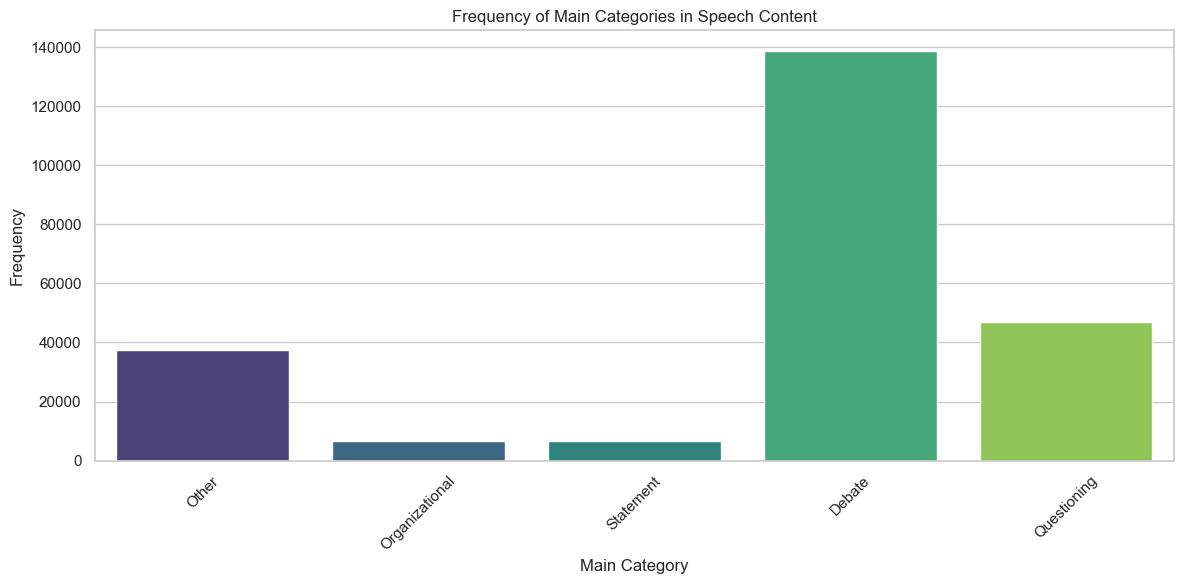

In [111]:
# create frequency diagram of main category
plt.figure(figsize=(12, 6))
sns.countplot(data=content_subset_with_classification, x='main_category', palette='viridis')
plt.title('Frequency of Main Categories in Speech Content')
plt.xlabel('Main Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


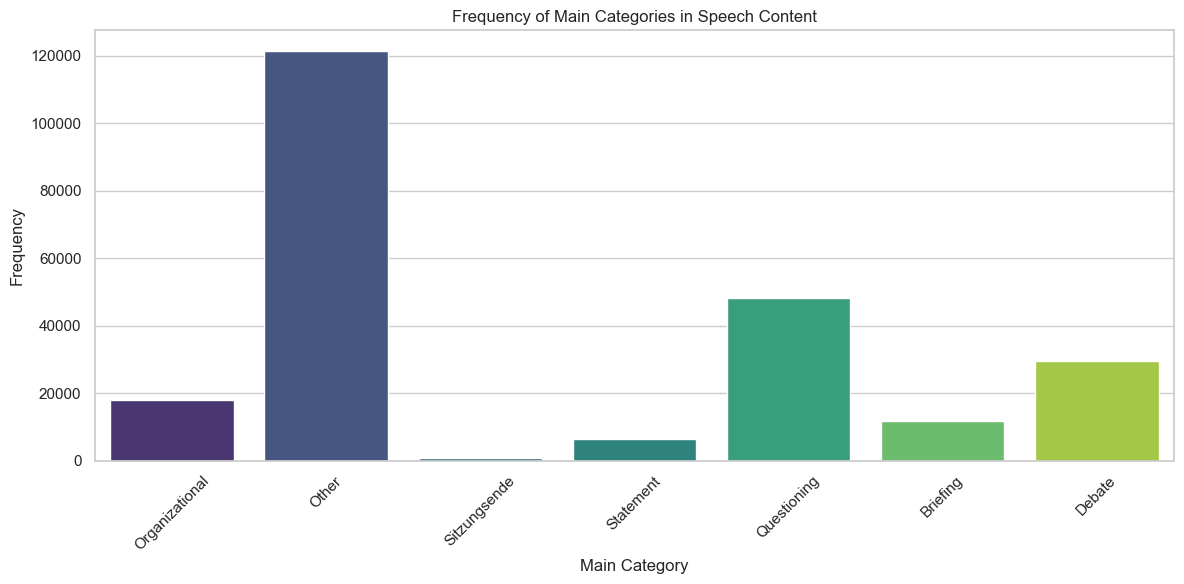

In [112]:
plt.figure(figsize=(12, 6))
sns.countplot(data=content_subset_with_classification, x='content_category', palette='viridis')
plt.title('Frequency of Main Categories in Speech Content')
plt.xlabel('Main Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As in Main_Category (the agenda-based matching), there are more matches not classified as "Other". we will proceed with the main_categories

## 4. Classification of Contributions

### 4.1 Allocation of contributions to parties

In [113]:
#make contributions dataframe with the last 100000 rows
contributions = contributions_raw.sort_values(by='speech_id').tail(100000)
# out of column content, check which faction is in there
# Step 1: Create a mapping of faction name/abbreviation to faction_id
faction_mapping = {row['abbreviation']: row['id'] for _, row in factions_raw.iterrows()}

# add Linken to mapping with number 7
faction_mapping['Linken'] = 7
faction_mapping['DIE Linke'] = 7
faction_mapping['GRÜNEN'] = 4
faction_mapping['CDU'] = 5
faction_mapping['F.D.P.'] = 15
faction_mapping['GRÜNE'] = 4
faction_mapping['BÜNDNISSES 90/DIE GRÜNEN'] = 4


# keep only rows in dictionary where faction id is 25, 5, 7
faction_mapping = {key: value for key, value in faction_mapping.items() if value in [25, 5, 7, 15, 0, 4,3, 20, 18]}
print(faction_mapping)


def extract_factions_with_positions(content):
    matched_factions = []
    positions = []
    for faction, faction_id in faction_mapping.items():
        # Use regex to ensure exact matching without duplicates
        for match in re.finditer(r'\b' + re.escape(faction) + r'\b', content, re.IGNORECASE):
            if faction_id not in matched_factions:  # Ensure uniqueness per faction_id
                matched_factions.append(faction_id)
                positions.append(match.start())  # Capture position
    return matched_factions, positions if matched_factions else ([], [])



# Step 4: Apply the function to the content of the last 40 rows
contributions[['faction_ids', 'faction_positions']] = contributions['content'].apply(
    lambda x: pd.Series(extract_factions_with_positions(x))
)

{'AfD': 0, 'Bündnis 90/Die Grünen': 4, 'DIE LINKE.': 7, 'CDU/CSU': 5, 'FDP': 15, 'SPD': 25, 'Fraktionslos': 18, 'BSW': 3, 'Gast': 20, 'Linken': 7, 'DIE Linke': 7, 'GRÜNEN': 4, 'CDU': 5, 'F.D.P.': 15, 'GRÜNE': 4, 'BÜNDNISSES 90/DIE GRÜNEN': 4}


In [114]:
# max speech id
max_speech_id = contributions_raw['speech_id'].max()
print(max_speech_id)

min_speech_id = contributions_raw['speech_id'].min()
print(min_speech_id)

846684
1


In [115]:
# find the rows with these speech ids: 846684 812792 in the content_df
print(content_df_raw[content_df_raw['id'] == 1])
content_df_raw[content_df_raw['id'] == 812792]

Empty DataFrame
Columns: [Unnamed: 0, id, electoral_term, session, first_name, document_url, last_name, faction_id, position_short, position_long, politician_id, top_item, top_title, speech_content, date, faction, year, speech_length, age, gender, tenure]
Index: []

[0 rows x 21 columns]


,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure
780369,780369,812792,18,89,claudia,https://dip21.bundestag.de/dip21/btp/18/18089.pdf,roth,4,Presidium of Parliament,vizepräsidentin,...,Zusatzpunkte 5,"Antrag der Abgeordneten Klaus Ernst, Thomas Nord, Wolfgang Gehrcke, weiterer Abgeordneter und der Fraktion DIE LINKE: CETA-Verhandlungsergebnis ablehnen Drucksache 18/4090 . . . . . . . . . . . . . . . . . . . . 8431 D in Verbindung mit","Vielen Dank, Frau Haßelmann, ich stelle diesen Antrag jetzt zur Abstimmung.",2015-02-27,Bündnis 90/Die Grünen,2015,75,59.0,weiblich,16.227397


### 4.2 Allocation of contribution types

In [116]:
# Dictionary with the reaction types found in the data
reaction_types = {
    "Beifall": "Applause",
    "Zuruf": "Interjection",
    "Heiterkeit": "Cheerfulness",
    "Widerspruch": "Objection",
    "Lachen": "Laughter",
    "Unruhe": "Disturbance",
    "Zustimmung": "Agreement",
    "]:" : "Comment",
    "] :" : "Comment",
    "Abg.:": "Comment",
}

def extract_reactions_with_positions(content):
    matched_reactions = []
    positions = []
    for reaction, reaction_type in reaction_types.items():
        for match in re.finditer(re.escape(reaction), content, re.IGNORECASE):
            matched_reactions.append(reaction_type)
            positions.append(match.start())  # Capture the position of each match
    # Ensure two empty lists are returned if no reactions are found
    return (matched_reactions, positions) if matched_reactions else ([], [])

# Apply the function and expand the result into two separate columns
contributions[['reaction_types', 'reaction_positions']] = contributions['content'].apply(
    lambda x: pd.Series(extract_reactions_with_positions(x))
)
# Display the updated DataFrame
contributions.sample(40)


,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions
2,0,(f),817486,[],"([], [])",[],[]
0,0,(Beifall bei der CDU/CSU - Michaela Noll [CDU/CSU]: Jetzt kommt etwas Vernünftiges!),833909,[5],[17],"[Applause, Comment]","[1, 49]"
3,78,(Tübingen),834094,[],"([], [])",[],[]
5,11,(Beifall beim BÜNDNIS 90/DIE GRÜNEN sowie bei Abgeordneten der LINKEN),820483,"[4, 7]","[14, 63]",[Applause],[1]
12,3,(Heiterkeit),818511,[],"([], [])",[Cheerfulness],[1]
2,8,(Beifall bei der CDU/CSU),814292,[5],[17],[Applause],[1]
2,0,(WSV-Zuständigkeitsanpassungsgesetz WSVZuAnpG),834924,[],"([], [])",[],[]
2,0,(Beifall im ganzen Hause),833412,[],"([], [])",[Applause],[1]
9,4,"(Beifall bei der SPD, der LINKEN und dem BÜNDNIS 90/DIE GRÜNEN)",827593,"[4, 25, 7]","[41, 17, 26]",[Applause],[1]
8,0,(Beifall bei der CDU/CSU),844011,[5],[17],[Applause],[1]


In [117]:
# It is striking that a lot of "contributions" are just names of cites. we will need to filter them out
# create list of cities
cities = cities_raw['Stadt'].tolist()

# check whether the contribution is just a city name
def contains_city_in_parentheses(content):
    for city in cities:
        if f"({city})" in content:
            return True
    return False

# Apply the function to the content column
contributions['city_mentions'] = contributions['content'].apply(contains_city_in_parentheses)

#show contributions where city mentions is true
contributions[contributions['city_mentions'] == True].sample(40)

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,city_mentions
37,2,(Chemnitz),842616,[],"([], [])",[],[],True
34,47,(Altötting),834094,[],"([], [])",[],[],True
4,0,(Beifall bei der CDU/CSU sowie der Abg . Dr . Rolf Mützenich [SPD] und Claudia Roth (Augsburg) [BÜNDNIS 90/DIE GRÜNEN]),818477,"[4, 5, 25]","[96, 17, 62]",[Applause],[1],True
11,31,(Duisburg),834912,[],"([], [])",[],[],True
16,24,(Backnang),812916,[],"([], [])",[],[],True
39,131,(Hof),815315,[],"([], [])",[],[],True
39,2,(Altötting),815234,[],"([], [])",[],[],True
10,1,(Köln),828704,[],"([], [])",[],[],True
11,27,(Bochum),823928,[],"([], [])",[],[],True
41,3,(Chemnitz),819926,[],"([], [])",[],[],True


In [118]:
# Filter out all contributions that are just city names
contributions_without_cities = contributions[~((contributions['city_mentions']) & (contributions['reaction_types'] == 'Other'))]
#check for other reactions
# Step 1: Check for rows where 'Other' is the only reaction type
only_other_reactions = contributions_without_cities[contributions_without_cities['reaction_types'].apply(lambda x: x == ["Other"])]
only_other_reactions = contributions_without_cities[contributions_without_cities['faction_ids'].isna()]

# save as excel to inspect
#only_other_reactions.to_excel('03_finalother_reactions.xlsx')

contributions_without_cities

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,city_mentions
4,0,(Beifall bei der LINKEN),812792,[7],[17],[Applause],[1],False
0,1,"(Dr . Petra Sitte [DIE LINKE]: Ach, das war es jetzt?)",812793,[7],[19],[Comment],[28],False
1,0,(Albert Stegemann [CDU/CSU]: Ganz offensichtlich ist er meiner Rede nicht gefolgt!),812793,[5],[19],[Comment],[26],False
1,0,"(Klaus Ernst [DIE LINKE]: Das ist ein anderes Thema! Mein Gott, Thema verfehlt!)",812794,[7],[14],[Comment],[23],False
0,1,(Beifall bei der CDU/CSU - Bernhard Kaster [CDU/CSU]: Und nicht alte Manuskripte rausholen! - Jutta Krellmann [DIE LINKE]: Das war eine schwache Nummer!),812794,"[5, 7]","[17, 111]","[Applause, Comment, Comment]","[1, 51, 120]",False
...,...,...,...,...,...,...,...,...
5,0,(Beifall bei Abgeordneten der LINKEN Peter Beyer [CDU/CSU]: So haben wir das aber auch verstanden!),846682,"[5, 7]","[50, 30]","[Applause, Comment]","[1, 57]",False
1,4,(2014),846682,[],"([], [])",[],[],False
0,5,(Beifall bei der LINKEN - Henning Otte [CDU/ CSU]: Eine Verschlimmbesserung!),846682,"[7, 5]","[17, 40]","[Applause, Comment]","[1, 48]",False
2,3,(Henning Otte [CDU/CSU]: Haben Sie auch gesagt!),846682,[5],[15],[Comment],[22],False


In [119]:
#change all "other" to "Exclamation" if content contains "!"

# Function to check and update the reaction_type
def update_reaction_type(row):
    if "!" in row['content'] and "Other" in row['reaction_types']:
        return ["Exclamation"]  # Replace "Other" with "Exclamation"
    return row['reaction_types']  # Keep the original value if condition not met

# Apply the function to the DataFrame
contributions_without_cities['reaction_types'] = contributions_without_cities.apply(update_reaction_type, axis=1)

# Display the updated DataFrame to check changes
contributions_without_cities.head()

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,city_mentions
4,0,(Beifall bei der LINKEN),812792,[7],[17],[Applause],[1],False
0,1,"(Dr . Petra Sitte [DIE LINKE]: Ach, das war es jetzt?)",812793,[7],[19],[Comment],[28],False
1,0,(Albert Stegemann [CDU/CSU]: Ganz offensichtlich ist er meiner Rede nicht gefolgt!),812793,[5],[19],[Comment],[26],False
1,0,"(Klaus Ernst [DIE LINKE]: Das ist ein anderes Thema! Mein Gott, Thema verfehlt!)",812794,[7],[14],[Comment],[23],False
0,1,(Beifall bei der CDU/CSU - Bernhard Kaster [CDU/CSU]: Und nicht alte Manuskripte rausholen! - Jutta Krellmann [DIE LINKE]: Das war eine schwache Nummer!),812794,"[5, 7]","[17, 111]","[Applause, Comment, Comment]","[1, 51, 120]",False


In [120]:
#Filter out all contributions  and safe in contributions_df only if reaction type is not other
contributions_df = contributions_without_cities[~contributions_without_cities['reaction_types'].apply(lambda x: x == ["Other"])]

#drop column city mentions
contributions_df.drop(columns=['city_mentions'], inplace=True)
contributions_df.head()

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions
4,0,(Beifall bei der LINKEN),812792,[7],[17],[Applause],[1]
0,1,"(Dr . Petra Sitte [DIE LINKE]: Ach, das war es jetzt?)",812793,[7],[19],[Comment],[28]
1,0,(Albert Stegemann [CDU/CSU]: Ganz offensichtlich ist er meiner Rede nicht gefolgt!),812793,[5],[19],[Comment],[26]
1,0,"(Klaus Ernst [DIE LINKE]: Das ist ein anderes Thema! Mein Gott, Thema verfehlt!)",812794,[7],[14],[Comment],[23]
0,1,(Beifall bei der CDU/CSU - Bernhard Kaster [CDU/CSU]: Und nicht alte Manuskripte rausholen! - Jutta Krellmann [DIE LINKE]: Das war eine schwache Nummer!),812794,"[5, 7]","[17, 111]","[Applause, Comment, Comment]","[1, 51, 120]"


### 4.3 Allocation of faction to reaction type

In [121]:
def match_factions_to_reactions(row):
    sorted_factions = [x for _, x in sorted(zip(row['faction_positions'], row['faction_ids']))]
    sorted_reactions = [x for _, x in sorted(zip(row['reaction_positions'], row['reaction_types']))]
    matched_factions = []
    matched_reactions = []
    used_for_comment = set()  # Track factions already assigned to "Comment"

    # Direct 1:1 matching if lengths are equal
    if len(sorted_factions) == len(sorted_reactions):
        return sorted_factions, sorted_reactions

    # Single faction or single reaction handling
    if len(sorted_factions) == 1:
        return sorted_factions * len(sorted_reactions), sorted_reactions
    if len(sorted_reactions) == 1:
        return sorted_factions, sorted_reactions * len(sorted_factions)

    # Process reactions with mismatched lengths
    reaction_idx = 0
    for faction_idx, faction in enumerate(sorted_factions):
        if reaction_idx >= len(sorted_reactions):
            break

        current_reaction = sorted_reactions[reaction_idx]
        
        if current_reaction == "Comment":
            # Find the closest unmatched faction by position for "Comment"
            while faction in used_for_comment and faction_idx < len(sorted_factions) - 1:
                faction_idx += 1
                faction = sorted_factions[faction_idx]
            if faction not in used_for_comment:
                matched_factions.append(faction)
                matched_reactions.append("Comment")
                used_for_comment.add(faction)
                reaction_idx += 1
        else:
            # Match non-comment reactions
            matched_factions.append(faction)
            matched_reactions.append(current_reaction)
            
            # Move to the next reaction if it’s not "Comment"
            if reaction_idx + 1 < len(sorted_reactions) and sorted_reactions[reaction_idx + 1] != "Comment":
                reaction_idx += 1

    # Handle remaining unmatched factions or reactions safely
    if len(matched_factions) < len(sorted_factions):
        matched_factions.extend(sorted_factions[len(matched_factions):])
        if matched_reactions:
            matched_reactions.extend([matched_reactions[-1]] * (len(sorted_factions) - len(matched_reactions)))
        else:
            matched_reactions.extend(["Unknown"] * (len(sorted_factions) - len(matched_reactions)))
    elif len(matched_reactions) < len(sorted_reactions):
        if matched_factions:
            matched_factions.extend([matched_factions[-1]] * (len(sorted_reactions) - len(matched_reactions)))
        else:
            matched_factions.extend(["Unknown"] * (len(sorted_reactions) - len(matched_factions)))
        matched_reactions.extend(sorted_reactions[reaction_idx:])

    return matched_factions, matched_reactions


# Apply the function to each row in contributions DataFrame
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(
    lambda row: pd.Series(match_factions_to_reactions(row)),
    axis=1
)


contributions_df.sample()

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,matched_factions,matched_reactions
2,4,(Beifall des Abg . Thomas Jarzombek [CDU/ CSU]),842793,[5],[37],[Applause],[1],[5],[Applause]


In [122]:
def match_factions_to_reactions(row):
    # Sort factions and reactions by their positions
    faction_positions = row['faction_positions']
    reaction_positions = row['reaction_positions']

    # Flatten lists if they are nested and sort them along with faction_ids and reaction_types
    if any(isinstance(i, list) for i in faction_positions):
        faction_positions = [item for sublist in faction_positions for item in sublist]
    if any(isinstance(i, list) for i in reaction_positions):
        reaction_positions = [item for sublist in reaction_positions for item in sublist]

    sorted_factions = [x for _, x in sorted(zip(faction_positions, row['faction_ids']))]
    sorted_reactions = [x for _, x in sorted(zip(reaction_positions, row['reaction_types']))]
    sorted_faction_positions = sorted(faction_positions)
    sorted_reaction_positions = sorted(reaction_positions)
    
    matched_factions = []
    matched_reactions = []
    used_for_comment = set()  # Track factions already assigned to "Comment"

    # If there are reactions but no factions, assign "All" to each reaction
    if not sorted_factions and sorted_reactions:
        matched_factions = ["All"] * len(sorted_reactions)
        matched_reactions = sorted_reactions
        return matched_factions, matched_reactions

    # Step 1: Match "Comment" reactions
    for reaction_idx, reaction in enumerate(sorted_reactions):
        if reaction == "Comment":
            # Find the faction immediately before the comment position
            comment_position = sorted_reaction_positions[reaction_idx]
            closest_faction_idx = None
            for idx, faction_position in enumerate(sorted_faction_positions):
                if faction_position < comment_position and sorted_factions[idx] not in used_for_comment:
                    closest_faction_idx = idx
                elif faction_position >= comment_position:
                    break

            if closest_faction_idx is not None:
                faction = sorted_factions[closest_faction_idx]
                matched_factions.append(faction)
                matched_reactions.append("Comment")
                used_for_comment.add(faction)  # Mark this faction as used
            else:
                # If no valid faction found, skip this comment
                continue

    # Step 2: Match remaining reactions
    faction_idx = 0
    for reaction_idx, reaction in enumerate(sorted_reactions):
        if reaction == "Comment":
            continue  # Skip comments, already matched

        while faction_idx < len(sorted_factions):
            faction = sorted_factions[faction_idx]
            faction_position = sorted_faction_positions[faction_idx]

            if faction not in used_for_comment:
                matched_factions.append(faction)
                matched_reactions.append(reaction)
                faction_idx += 1
                break  # Move to the next reaction after finding a match
            faction_idx += 1

    # Handle unmatched factions by appending remaining factions, if needed
    if len(matched_factions) < len(sorted_factions):
        unmatched_factions = [f for f in sorted_factions if f not in used_for_comment and f not in matched_factions]
        matched_factions.extend(unmatched_factions)
        # Extend matched_reactions with the last known reaction type or leave as blank
        if matched_reactions:
            matched_reactions.extend([matched_reactions[-1]] * (len(matched_factions) - len(matched_reactions)))

    return matched_factions, matched_reactions

# Apply the function to each row in contributions DataFrame
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(
    lambda row: pd.Series(match_factions_to_reactions(row)),
    axis=1
)

# Display the updated DataFrame
contributions_df.sample(10)


,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,matched_factions,matched_reactions
4,7,"(Sven-Christian Kindler [BÜNDNIS 90/DIE GRÜNEN]: Es schmerzt natürlich, dass man den Landwirtschaftsminister dort nicht mehr stellt! Das kann ich verstehen!)",820517,[4],[25],[Comment],[46],[4],[Comment]
13,4,"(Renate Künast [BÜNDNIS 90/DIE GRÜNEN]: Nein, ich habe gesagt: Das war ein Versprecher, weil ich im Eifer des Gefechts war!)",814971,[4],[16],[Comment],[37],[4],[Comment]
3,10,"(Maria Klein-Schmeink [BÜNDNIS 90/DIE GRÜNEN]: Ja, gut!)",832682,[4],[23],[Comment],[44],[4],[Comment]
0,10,(Beifall beim BÜNDNIS 90/DIE GRÜNEN sowie bei Abgeordneten der LINKEN),839142,"[4, 7]","[14, 63]",[Applause],[1],"[4, 7]","[Applause, Applause]"
17,54,(Beifall bei der LINKEN),823877,[7],[17],[Applause],[1],[7],[Applause]
3,2,(Hans-Christian Ströbele [BÜNDNIS 90/DIE GRÜNEN]: Die gibt es nicht! Wo steht die? Im 129 a steht nichts davon!),830391,[4],[26],[Comment],[47],[4],[Comment]
2,0,(EU-StA),836098,[],"([], [])",[],[],[],[]
3,12,(Sönke Rix [SPD]: Die Schlacht ist doch geschlagen!),812891,[25],[12],[Comment],[15],[25],[Comment]
3,1,(Irene Mihalic [BÜNDNIS 90/DIE GRÜNEN]: Sagen Sie das mal Ihrem Landesvorsitzenden!),829701,[4],[16],[Comment],[37],[4],[Comment]
2,6,(Beifall bei Abgeordneten der SPD und der LINKEN),818545,"[25, 7]","[30, 42]",[Applause],[1],"[25, 7]","[Applause, Applause]"


In [123]:
# show where leghth of lists are not the same for faction_ids and reaction_types
inspection_df= (contributions_df[contributions_df['faction_ids'].str.len() != contributions_df['reaction_types'].str.len()])

# filter away all where reaction type is other and faction ids is nan
inspection_df = inspection_df[~(inspection_df['reaction_types'].apply(lambda x: 'Other' in x) & inspection_df['faction_ids'].isna())]

# filter away all faction ids nan
inspection_df = inspection_df[~inspection_df['faction_ids'].isna()]

# show where length of list of faction_ids is not the same as reaction_types
inspection_df = inspection_df[inspection_df['faction_ids'].str.len() != inspection_df['reaction_types'].str.len()]

# show where length of faction id is more than 1 and length of reaction type is more than 1
inspection_df = inspection_df[(inspection_df['faction_ids'].str.len() > 1)]
inspection_df = inspection_df[(inspection_df['reaction_types'].str.len() > 1)]

# increase columnn with for content
pd.set_option('display.max_colwidth', None)

print(len(inspection_df))
inspection_df.sample()

3325


,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,matched_factions,matched_reactions
11,1,(Beate Müller-Gemmeke [BÜNDNIS 90/ DIE GRÜNEN]: Das ist keine Antwort auf die Frage! - Matthias W . Birkwald [DIE LINKE]: Einmal und nie wieder! - Dr . Wolfgang Strengmann-Kuhn [BÜNDNIS 90/DIE GRÜNEN]: Und wer hat ihn erfunden?),835072,"[4, 7]","[178, 110]","[Comment, Comment, Comment]","[45, 119, 199]","[7, 4]","[Comment, Comment]"


In [124]:
# show where matched_factions is not the same length as matched_reaactins
inspection_df3 = contributions_df[contributions_df['matched_factions'].str.len() != contributions_df['matched_reactions'].str.len()]
print(len(inspection_df3))
inspection_df3.sample(10)

205


,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,matched_factions,matched_reactions
6,2,"(Wolfgang Gehrcke [DIE LINKE], an den Abg . Volker Kauder [CDU/CSU] gewandt: Der fällt durch, Herr Kauder!)",845171,"[5, 7]","[59, 19]",[],[],"[7, 5]",[]
1,1,(www .morgenpost .de/politik/article2l0986363/Bundespolizei-prueft-nach-AfD-Leak-Konsequenzen-fuer-Beamte .html; https://twitter .com/LarsWienand),818025,[0],[72],[],[],[0],[]
0,0,(BÜNDNIS 90/DIE GRÜNEN: Ich rede auch gleich zehn Minuten!),826329,[4],[1],[],[],[4],[]
0,0,(Abg. Hans-Christian Ströbele [BÜNDNIS 90/ DIE GRÜNEN] meldet sich zu einer Zwischenfrage),846448,[4],[47],[],[],[4],[]
12,0,"(Christian Schmidt [Fürth] [CDU/CSU], an die Abg. Steffi Lemke [BÜNDNIS 90/DIE GRÜNEN] gewandt: Jetzt hat er mir ja die Zeit zum Fragen gegeben!)",824785,"[4, 5]","[64, 28]",[],[],"[5, 4]",[]
0,1,(Abg. Dr. Thomas Gambke [BÜNDNIS 90/ DIE GRÜNEN] nimmt wieder Platz),832937,[4],[41],[],[],[4],[]
1,0,"(Volker Kauder [CDU/CSU], an den Abg. Andrej Hunko [DIE LINKE] gewandt: Dann muss der abgestellt werden, nicht der Herr Hofreiter!)",833430,"[5, 7]","[16, 52]",[],[],"[5, 7]",[]
9,3,"(Albert Rupprecht [CDU/CSU], an BÜNDNIS 90/DIE GRÜNEN gewandt: Was machen die Grünen?)",820930,"[4, 5]","[32, 19]",[],[],"[5, 4]",[]
1,1,(Abg . Katja Dörner [BÜNDNIS 90/DIE GRÜNEN] meldet sich zu einer Zwischenfrage),838337,[4],[21],[],[],[4],[]
0,0,(Abg. Max Straubinger [CDU/CSU] erhebt sich),833018,[5],[23],[],[],[5],[]


In [125]:
#equalize row lengths
def equalize_lists(row):
    matched_factions = row['matched_factions']
    matched_reactions = row['matched_reactions']

    # If matched_reactions is shorter, fill empty slots with "Other"
    if len(matched_reactions) < len(matched_factions):
        missing_count = len(matched_factions) - len(matched_reactions)
        matched_reactions.extend(["Other"] * missing_count)

    # Return the modified lists
    return pd.Series([matched_factions, matched_reactions])

# Apply the equalize_lists function to each row
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(equalize_lists, axis=1)

contributions_df.sample(10)

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,matched_factions,matched_reactions
0,0,(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU),843425,"[5, 25]","[48, 17]",[Applause],[1],"[25, 5]","[Applause, Applause]"
0,5,(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU - Volker Beck [Köln] [BÜNDNIS 90/DIE GRÜNEN]: Wollen Sie nächste Woche einen Gesetzentwurf von Frau Haßelmann?),833814,"[4, 5, 25]","[78, 48, 17]","[Applause, Comment]","[1, 99]","[4, 25, 5]","[Comment, Applause, Applause]"
0,4,(Beifall bei der CDU/CSU und der SPD),817691,"[5, 25]","[17, 33]",[Applause],[1],"[5, 25]","[Applause, Applause]"
1,0,(Fürth),826240,[],"([], [])",[],[],[],[]
0,1,(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU),817164,"[5, 25]","[48, 17]",[Applause],[1],"[25, 5]","[Applause, Applause]"
1,5,(Kathrin Vogler [DIE LINKE]: Richtig!),828785,[7],[17],[Comment],[26],[7],[Comment]
1,0,(Heiterkeit und Beifall bei Abgeordneten des BÜNDNISSES 90/DIE GRÜNEN),843838,[4],[63],"[Applause, Cheerfulness]","[16, 1]",[4],[Cheerfulness]
1,2,(Michael Grosse-Brömer [CDU/CSU]: Auch das kriegen wir hin! - Dr . Petra Sitte [DIE LINKE]: Panik gibt es bei uns nicht!),841924,"[5, 7]","[24, 80]","[Comment, Comment]","[31, 89]","[5, 7]","[Comment, Comment]"
12,5,"(Dr . Valerie Wilms [BÜNDNIS 90/DIE GRÜNEN]: Ja, aber wir haben eine andere Verantwortung! - Matthias Gastel [BÜNDNIS 90/ DIE GRÜNEN]: Sie haben keine Sachkriterien!)",833934,[4],[21],"[Comment, Comment]","[42, 132]",[4],[Comment]
17,6,(Beifall bei der SPD und der CDU/CSU),842020,"[5, 25]","[29, 17]",[Applause],[1],"[25, 5]","[Applause, Applause]"


In [126]:
# Now explode the DataFrame to have each reaction in its own row
contributions_exploded = contributions_df.explode(['matched_factions', 'matched_reactions'], ignore_index=True)

# Display the resulting DataFrame
contributions_exploded.head()

,text_position,content,speech_id,faction_ids,faction_positions,reaction_types,reaction_positions,matched_factions,matched_reactions
0,0,(Beifall bei der LINKEN),812792,[7],[17],[Applause],[1],7,Applause
1,1,"(Dr . Petra Sitte [DIE LINKE]: Ach, das war es jetzt?)",812793,[7],[19],[Comment],[28],7,Comment
2,0,(Albert Stegemann [CDU/CSU]: Ganz offensichtlich ist er meiner Rede nicht gefolgt!),812793,[5],[19],[Comment],[26],5,Comment
3,0,"(Klaus Ernst [DIE LINKE]: Das ist ein anderes Thema! Mein Gott, Thema verfehlt!)",812794,[7],[14],[Comment],[23],7,Comment
4,1,(Beifall bei der CDU/CSU - Bernhard Kaster [CDU/CSU]: Und nicht alte Manuskripte rausholen! - Jutta Krellmann [DIE LINKE]: Das war eine schwache Nummer!),812794,"[5, 7]","[17, 111]","[Applause, Comment, Comment]","[1, 51, 120]",5,Comment


# 5. Content Dataframe Statistics

## 5.1 Reactions per Party

In [127]:
# Step 1: Filter the DataFrame to exclude "Debate" and "Other" in "main_category"
debate_df = content_subset_with_classification[
    content_subset_with_classification['main_category'].isin(['Debate', 'Other'])
]

# match faction id to speech_politician based on the previous entry


# Step 2: Filter for "Question or Comment" entries and group by speech_politician to count only one per speech
# We'll consider only unique pairs of (speech_politician, faction) for "Question or Comment"
comments_df = debate_df[
    (debate_df['entry_classification'] == 'Question or Comment')
].drop_duplicates(subset=['electoral_term','session', 'politician_id', 'speech_politician'])

comments_df

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,age,gender,tenure,sub_category,main_category,new_tagesordnungspunkt,content_category,entry_classification,speech_politician,speech_politician_faction
247,698121,729717,17,4,markus,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,kurth,4,Member of Parliament,,...,43.0,männlich,7.035616,Request,Debate,False,Other,Question or Comment,11003823.0,Bündnis 90/Die Grünen
258,698132,729728,17,4,hubertus,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,heil,25,Member of Parliament,,...,37.0,männlich,10.989041,Request,Debate,False,Other,Question or Comment,11003839.0,CDU/CSU
273,698147,729743,17,4,anton,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,schaaf,25,Member of Parliament,,...,47.0,männlich,6.821918,Request,Debate,False,Other,Question or Comment,11002812.0,CDU/CSU
278,698152,729748,17,4,heinrich l,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,kolb,15,Member of Parliament,,...,53.0,männlich,18.734247,Request,Debate,False,Other,Question or Comment,11002812.0,CDU/CSU
282,698156,729752,17,4,volker,https://dip21.bundestag.de/dip21/btp/17/17004.pdf,beck,4,Member of Parliament,,...,48.0,männlich,14.980822,Request,Debate,False,Other,Question or Comment,11002812.0,CDU/CSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236098,933972,1072021,20,186,christian,https://dip21.bundestag.de/dip21/btp/20/20186.pdf,haase,5,Member of Parliament,,...,58.0,männlich,10.495890,Other,Other,False,Other,Question or Comment,11003530.0,FDP
236380,934254,1075832,20,187,corinna,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,rüffer,4,Member of Parliament,,...,48.0,weiblich,10.701370,Request,Debate,False,Other,Question or Comment,11005097.0,SPD
236384,934258,1075836,20,187,mike,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,moncsek,0,Member of Parliament,,...,60.0,männlich,2.375342,Request,Debate,False,Other,Question or Comment,11005097.0,SPD
236452,934326,1075904,20,187,julian,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pahlke,4,Member of Parliament,,...,32.0,männlich,2.873973,Request,Debate,False,Other,Question or Comment,11005159.0,CDU/CSU


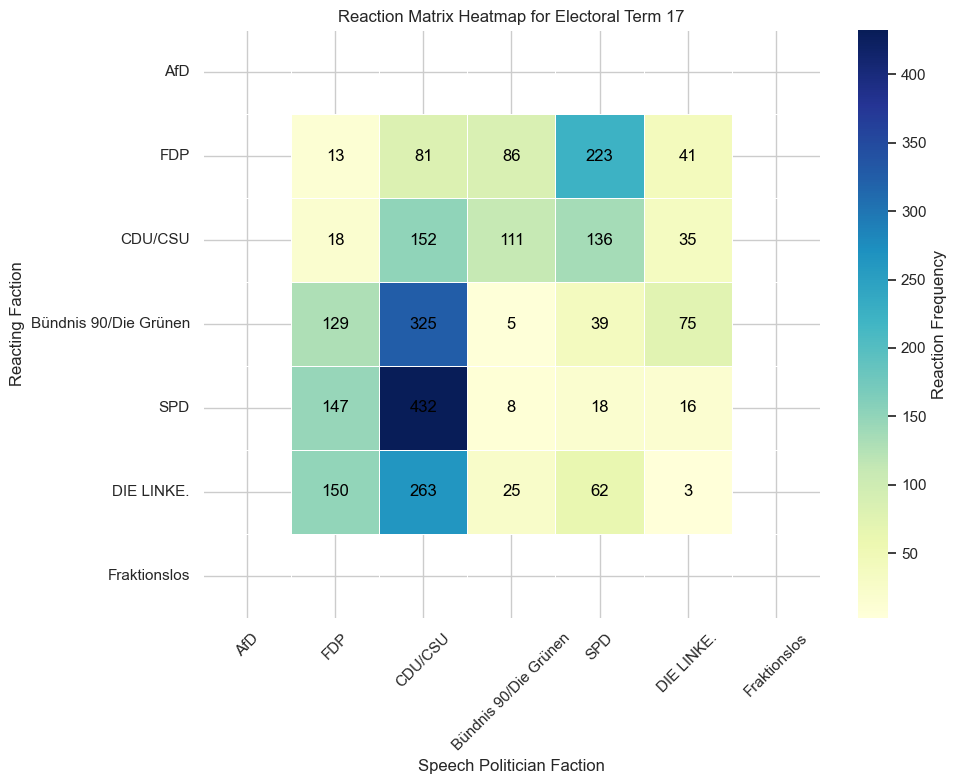

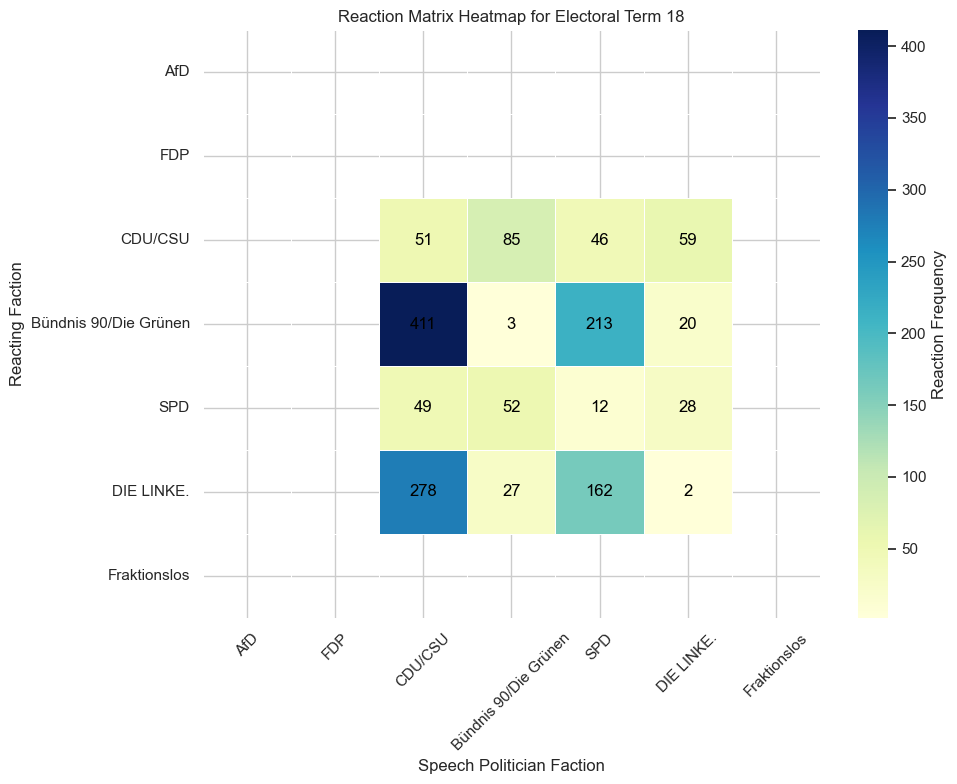

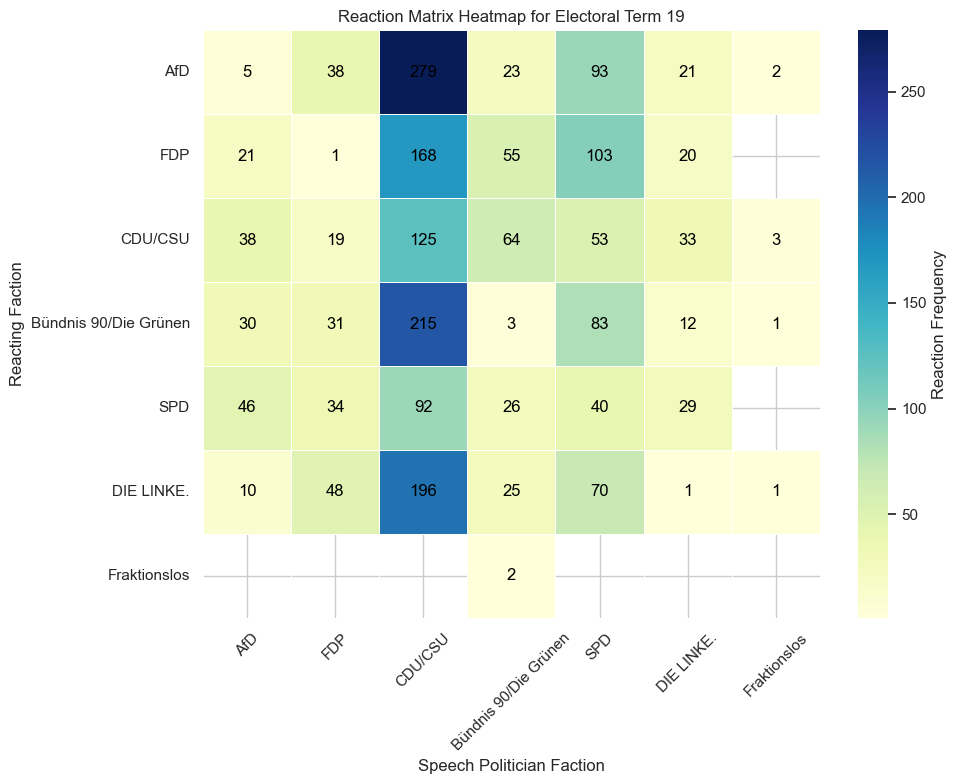

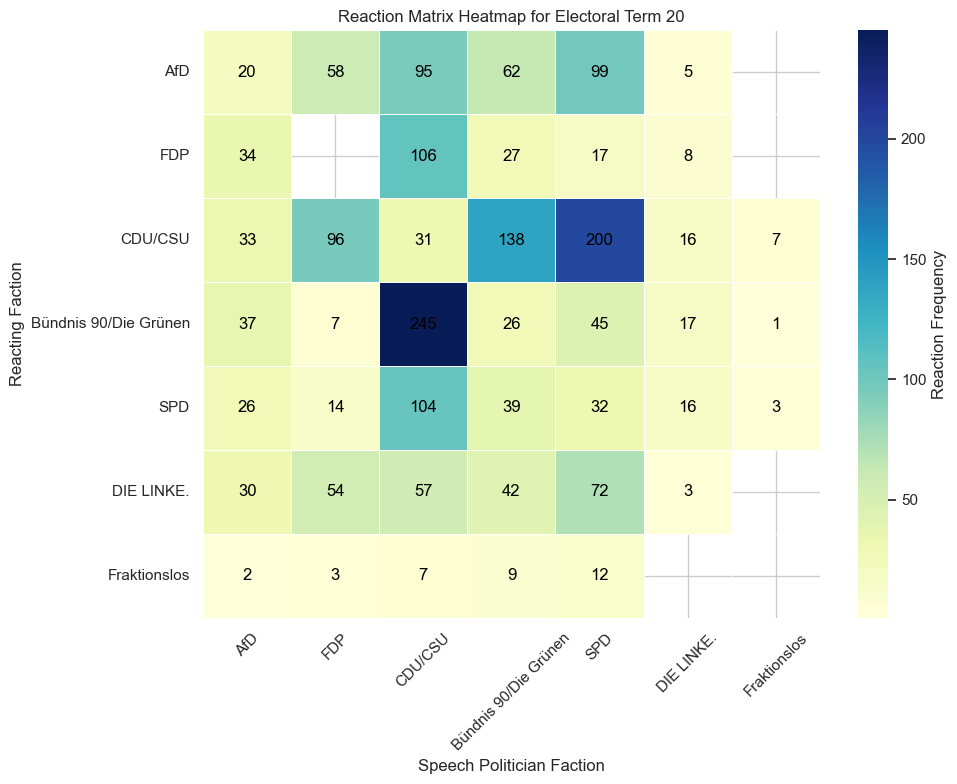

In [128]:
reaction_data = debate_content_subset[debate_content_subset['entry_classification'] == "Question or Comment"]

faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']


for term in reaction_data['electoral_term'].unique():
    # Filter data for the current electoral term
    term_data = reaction_data[reaction_data['electoral_term'] == term]
    
    # Create a cross-tabulation to count occurrences of each reaction relationship
    reaction_matrix = pd.crosstab(term_data['faction'], term_data['speech_politician_faction'])
    
    # Reindex to ensure the correct order of rows and columns
    reaction_matrix = reaction_matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
    
    # Create a mask for cells with zero values
    mask = reaction_matrix == 0
    
    # Plot heatmap for the current electoral term with custom settings
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        reaction_matrix, 
        annot=True, 
        cmap="YlGnBu", 
        fmt="d", 
        linewidths=0.5, 
        cbar_kws={'label': 'Reaction Frequency'}, 
        mask=mask,  # Apply the mask to hide zeros
        annot_kws={"color": "black"}  # Set annotation color for non-zero values
    )
    plt.title(f'Reaction Matrix Heatmap for Electoral Term {term}')
    plt.xlabel('Speech Politician Faction')
    plt.ylabel('Reacting Faction')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## 5.2 Reactions over time

### 5.2.1 Reactions over time - policicians reacting

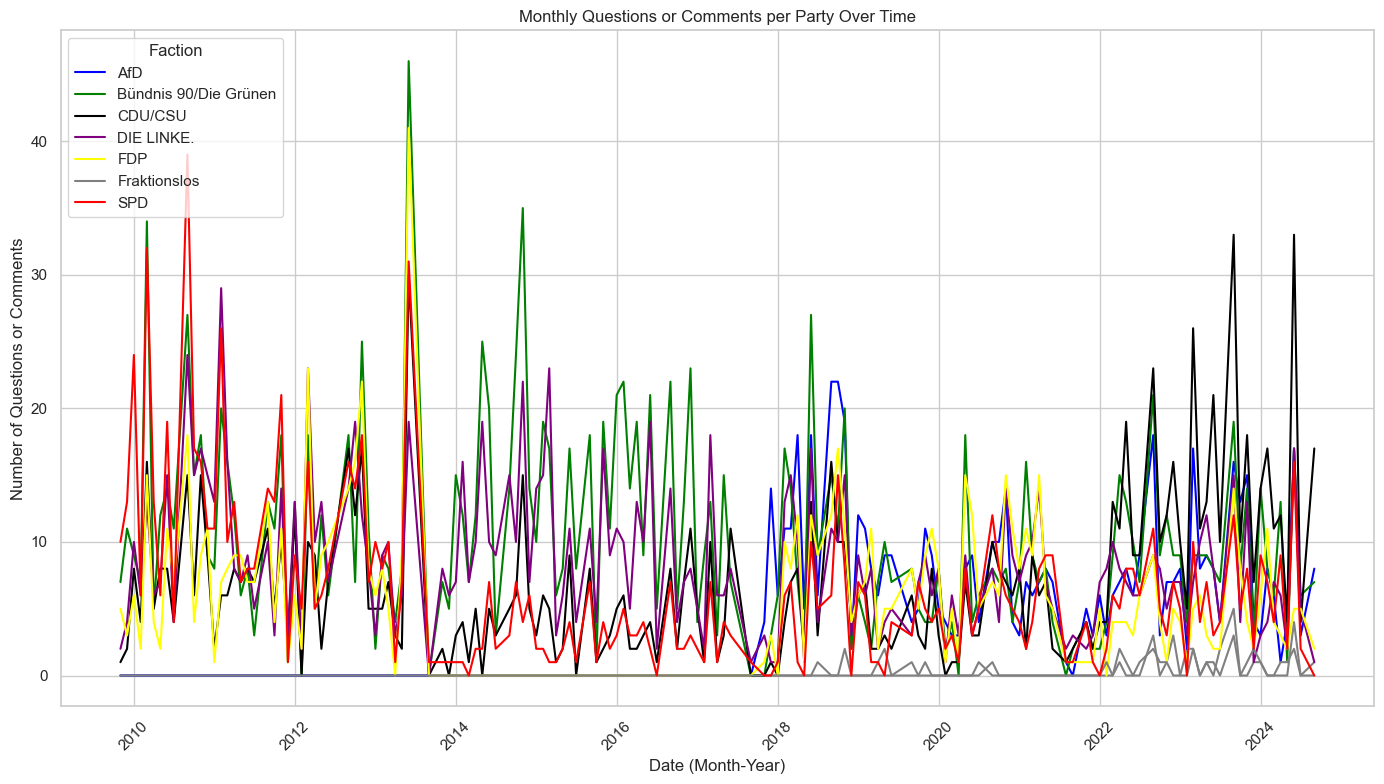

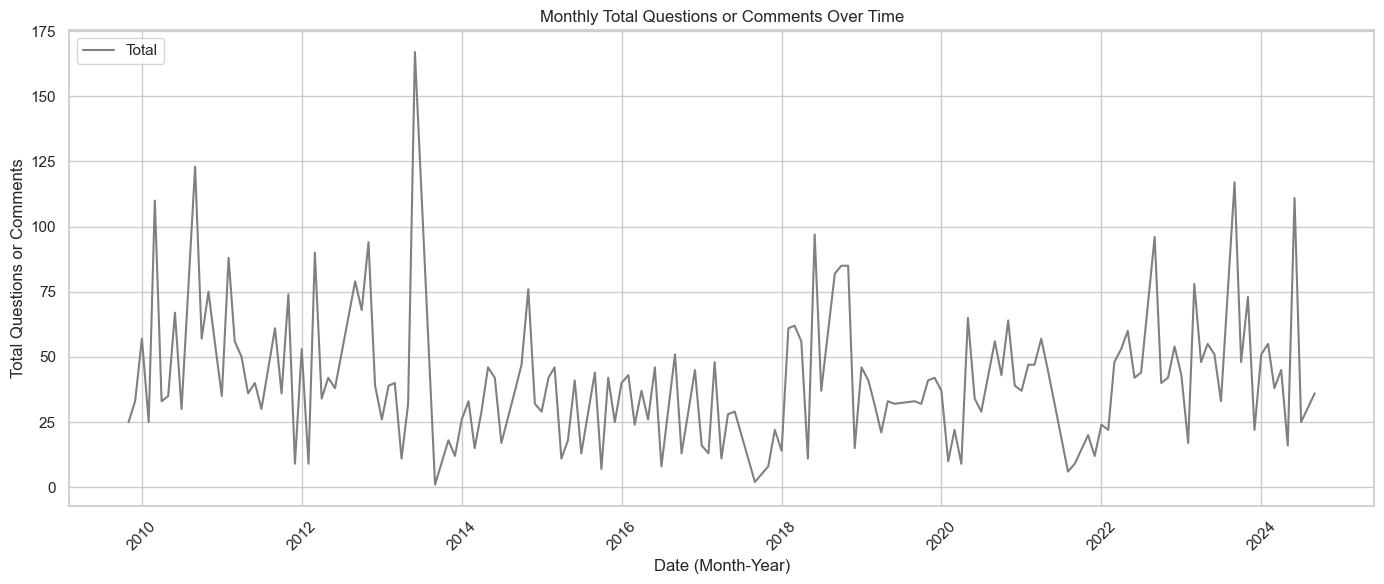

In [129]:
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'purple',
    'AfD': 'blue'
}

# Ensure 'date' column is in datetime format if not already
comments_df['date'] = pd.to_datetime(comments_df['date'])

# Step 1: Create a 'month_year' column for each entry
comments_df['month_year'] = comments_df['date'].dt.to_period('M')

# Step 2: Group by 'month_year' and 'faction' to count the number of "Question or Comment" entries per faction per month
monthly_counts = comments_df.groupby(['month_year', 'faction']).size().reset_index(name='count')

# Step 3: Pivot the data to have factions as columns, filling any missing values with 0
monthly_counts_pivot = monthly_counts.pivot(index='month_year', columns='faction', values='count').fillna(0)

# Step 4: Add a "Total" column to represent the sum across all factions for each month
monthly_counts_pivot['Total'] = monthly_counts_pivot.sum(axis=1)

# Step 5: Plot each faction in one chart
plt.figure(figsize=(14, 8))
for faction in monthly_counts_pivot.columns[:-1]:  # Exclude the 'Total' column
    color = color_map.get(faction, 'gray')
    plt.plot(
        monthly_counts_pivot.index.to_timestamp(), 
        monthly_counts_pivot[faction], 
        label=faction, 
        color=color
    )

# Customize plot appearance for faction-specific chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Number of Questions or Comments')
plt.title('Monthly Questions or Comments per Party Over Time')
plt.legend(title='Faction', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Plot the 'Total' line in a separate chart
plt.figure(figsize=(14, 6))
plt.plot(
    monthly_counts_pivot.index.to_timestamp(), 
    monthly_counts_pivot['Total'], 
    label='Total', 
    color='gray'
)

# Customize plot appearance for the total line chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Total Questions or Comments')
plt.title('Monthly Total Questions or Comments Over Time')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [136]:
# show month with the highest amounnt of reactions
monthly_counts_pivot['Total'].idxmax()


Period('2013-06', 'M')

In [141]:
#out of the content_df_raw get the rows of 06-2013
content_subset_with_classification['date'] = pd.to_datetime(content_subset_with_classification['date'])
content_subset_with_classification['month_year'] = content_subset_with_classification['date'].dt.to_period('M')

june_2013 = content_subset_with_classification[content_subset_with_classification['month_year'] == '2013-06']
# download as excel
# june_2013.to_excel('june_2013.xlsx')

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,tenure,sub_category,main_category,new_tagesordnungspunkt,content_category,entry_classification,speech_politician,speech_politician_faction,month_year,content_short
10,697884,729480,17,1,wolfgang,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,thierse,25,Member of Parliament,,...,19.076712,Organizational,Organizational,False,Organizational,Other,NaN,NaN,2009-10,"Ja, ich nehme die Wahl an."
20,697894,729490,17,2,angela,https://dip21.bundestag.de/dip21/btp/17/17002.pdf,merkel,5,Member of Parliament,,...,18.789041,Organizational,Organizational,False,Organizational,Other,NaN,NaN,2009-10,"Herr Präsident, ich nehme die Wahl an und bedanke mich für das Vertrauen."
23,697897,729493,17,2,angela,https://dip21.bundestag.de/dip21/btp/17/17002.pdf,merkel,5,Chancellor,,...,18.789041,Organizational,Organizational,False,Other,Other,NaN,NaN,2009-10,"Ich schwöre, dass ich meine Kraft dem Wohle des deutschen Volkes widmen, seinen Nutzen mehren, Schad"
26,697900,729496,17,2,guido,https://dip21.bundestag.de/dip21/btp/17/17002.pdf,westerwelle,15,Minister,bundesminister des auswärtigen,...,13.673973,Organizational,Organizational,False,Other,Other,NaN,NaN,2009-10,"Ich schwöre es, so wahr mir Gott helfe."
28,697902,729498,17,2,Thomas,https://dip21.bundestag.de/dip21/btp/17/17002.pdf,maizière,5,Minister,bundesminister des innern,...,3.934247,Organizational,Organizational,False,Other,Other,NaN,NaN,2009-10,"Ich schwöre es, so wahr mir Gott helfe."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236467,934341,1075919,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,25.887671,Request,Debate,False,Other,Speech Intro,11005172.0,Bündnis 90/Die Grünen,2024-09,Das Wort hat der Kollege Peter Aumer für die CDU/CSU-Fraktion.
236469,934343,1075921,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,25.887671,Request,Debate,False,Other,Speech Intro,11004004.0,CDU/CSU,2024-09,Das Wort hat der Abgeordnete Thomas Seitz.
236471,934345,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,25.887671,Request,Debate,False,Other,Guidance,11004891.0,AfD,2024-09,Herr Abgeordneter.
236472,934346,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,,...,6.594521,Request,Debate,False,Other,Speech Contribution or Answer,11004891.0,AfD,2024-09,Vielen Dank.


### 5.2.2. Reactions over time - speeches reacted to

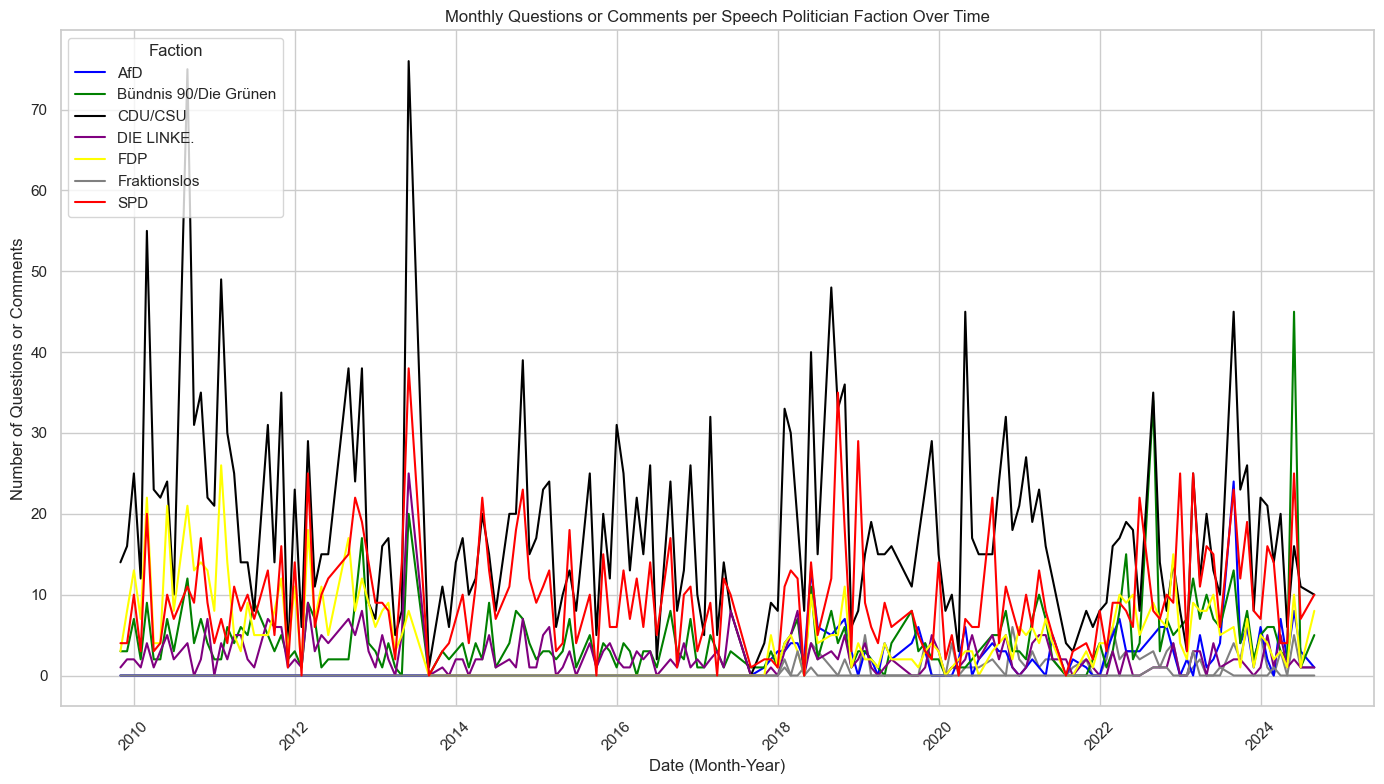

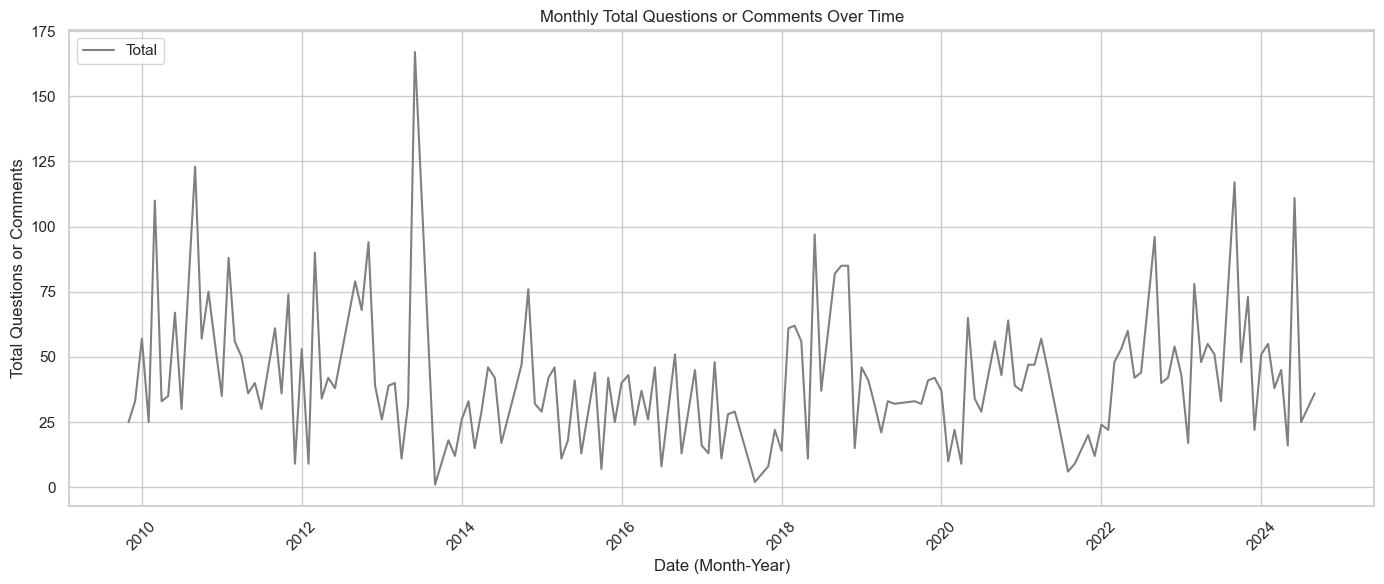

In [130]:
monthly_counts_speech = comments_df.groupby(['month_year', 'speech_politician_faction']).size().reset_index(name='count')

# Step 3: Pivot the data to have factions as columns, filling any missing values with 0
monthly_counts_speech_pivot = monthly_counts_speech.pivot(index='month_year', columns='speech_politician_faction', values='count').fillna(0)

# Step 4: Add a "Total" column to represent the sum across all factions for each month
monthly_counts_speech_pivot['Total'] = monthly_counts_speech_pivot.sum(axis=1)

# Step 5: Plot each faction in one chart
plt.figure(figsize=(14, 8))
for faction in monthly_counts_speech_pivot.columns[:-1]:  # Exclude the 'Total' column
    color = color_map.get(faction, 'gray')
    plt.plot(
        monthly_counts_speech_pivot.index.to_timestamp(), 
        monthly_counts_speech_pivot[faction], 
        label=faction, 
        color=color
    )

# Customize plot appearance for faction-specific chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Number of Questions or Comments')
plt.title('Monthly Questions or Comments per Speech Politician Faction Over Time')
plt.legend(title='Faction', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Plot the 'Total' line in a separate chart
plt.figure(figsize=(14, 6))
plt.plot(
    monthly_counts_speech_pivot.index.to_timestamp(), 
    monthly_counts_speech_pivot['Total'], 
    label='Total', 
    color='gray'
)

# Customize plot appearance for the total line chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Total Questions or Comments')
plt.title('Monthly Total Questions or Comments Over Time')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Contributions Dataframe Statistics

In [131]:
# merge contributions_df on content_subset_with_classification based on speech_id
content_subset_with_classification_contribution = content_subset_with_classification.merge(
    contributions_exploded[['speech_id', 'matched_factions', 'matched_reactions']],
    left_on='id',
    right_on='speech_id',
    how='left'
)

In [132]:
# Create a dictionary mapping faction IDs to faction names
faction_name_mapping = dict(zip(factions_raw['id'], factions_raw['abbreviation']))

# Define the function to map faction IDs to names, handling potential issues
def map_factions_to_names(faction_list):
    # Check if faction_list is a valid list, otherwise return as-is
    if isinstance(faction_list, list):
        # Convert each faction ID to the corresponding name or 'Unknown' if ID is not found
        return [faction_name_mapping.get(faction_id, 'Unknown') for faction_id in faction_list]
    elif pd.notna(faction_list):  # If it's a single ID, convert directly
        return faction_name_mapping.get(faction_list, 'Unknown')
    return faction_list  # Return NaN or None values as they are

# Apply the mapping function to 'matched_factions' column
content_subset_with_classification_contribution['matched_factions_name'] = content_subset_with_classification_contribution['matched_factions'].apply(map_factions_to_names)

# Sample output to verify
content_subset_with_classification_contribution.sample(40)

,Unnamed: 0,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,...,main_category,new_tagesordnungspunkt,content_category,entry_classification,speech_politician,speech_politician_faction,speech_id,matched_factions,matched_reactions,matched_factions_name
227165,810844,843341,18,231,edelgard,https://dip21.bundestag.de/dip21/btp/18/18231.pdf,bulmahn,25,Presidium of Parliament,vizepräsidentin,...,Debate,False,Other,Guidance,11004357.0,CDU/CSU,843341.0,25,Applause,SPD
135335,791087,823533,18,139,matern,https://dip21.bundestag.de/dip21/btp/18/18139.pdf,marschall,5,Member of Parliament,,...,Debate,False,Other,Short Intervention,11004349.0,CDU/CSU,823533.0,4,Applause,Bündnis 90/Die Grünen
289864,861232,1005366,19,182,petra,https://dip21.bundestag.de/dip21/btp/19/19182.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,Debate,False,Questioning,Speech Intro,11004114.0,DIE LINKE.,NaN,NaN,NaN,NaN
65061,762935,795273,18,8,michael,https://dip21.bundestag.de/dip21/btp/18/18008.pdf,kretschmer,5,Member of Parliament,,...,Debate,False,Other,Speech Beginning,11003572.0,CDU/CSU,NaN,NaN,NaN,NaN
362494,933862,1071911,20,186,till,https://dip21.bundestag.de/dip21/btp/20/20186.pdf,steffen,4,Member of Parliament,,...,Other,False,Other,Speech Beginning,11005228.0,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN
332889,904257,1065391,20,97,alexander,https://dip21.bundestag.de/dip21/btp/20/20097.pdf,throm,5,Member of Parliament,,...,Debate,False,Other,Speech Beginning,11004917.0,CDU/CSU,NaN,NaN,NaN,NaN
122767,788512,820954,18,127,joachim,https://dip21.bundestag.de/dip21/btp/18/18127.pdf,pfeiffer,5,Member of Parliament,,...,Other,False,Other,Speech Contribution or Answer,11003608.0,CDU/CSU,820954.0,25,Applause,SPD
326645,898013,1090103,20,77,martin,https://dip21.bundestag.de/dip21/btp/20/20077.pdf,plum,5,Member of Parliament,,...,Debate,False,Debate,Speech Beginning,11005182.0,CDU/CSU,NaN,NaN,NaN,NaN
147151,793113,825567,18,149,johannes,https://dip21.bundestag.de/dip21/btp/18/18149.pdf,singhammer,5,Presidium of Parliament,vizepräsident,...,Debate,False,Other,Speech Intro,11003029.0,SPD,825567.0,25,Applause,SPD
330302,901670,1117428,20,89,petra,https://dip21.bundestag.de/dip21/btp/20/20089.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,...,Debate,False,Other,Speech Intro,11005172.0,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN


In [133]:
term_18_data = content_subset_with_classification_contribution[content_subset_with_classification_contribution['electoral_term'] == 18]

#Get the unique reaction types in the data
reaction_types = term_18_data['matched_reactions'].unique()

# Dictionary to hold the count matrix for each reaction type
reaction_matrices = {}

# Loop over each reaction type to create separate matrices
for reaction in reaction_types:
    # Filter for the specific reaction type
    reaction_data = term_18_data[term_18_data['matched_reactions'] == reaction]

    # Create a pivot table counting how often each faction (in rows) reacted toward each other faction (in columns)
    reaction_matrix = reaction_data.pivot_table(
        index='faction',  # Assuming 'faction_id' identifies the faction doing the reaction
        columns='matched_factions_name',  # The faction being reacted to
        values='matched_reactions',  # The reaction type we're counting
        aggfunc='size',  # Count occurrences
        fill_value=0  # Fill NaN with 0 for counts
    )

    # Store the matrix in the dictionary with the reaction type as the key
    reaction_matrices[reaction] = reaction_matrix

# Display matrices for each reaction type
for reaction, matrix in reaction_matrices.items():
    print(f"Reaction Type: {reaction}")
    display(matrix)  # Using display to show each matrix clearly

Reaction Type: nan


matched_factions_name
faction


Reaction Type: Applause


matched_factions_name,AfD,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,FDP,SPD,Unknown
faction,,,,,,,
Bündnis 90/Die Grünen,2,3647,5932,3812,0,5756,234
CDU/CSU,2,6283,10700,6807,4,10340,386
DIE LINKE.,2,2370,4034,2495,0,3957,133
SPD,5,5108,8751,5403,2,8629,401


Reaction Type: Comment


matched_factions_name,AfD,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,FDP,SPD,Unknown
faction,,,,,,,
Bündnis 90/Die Grünen,0,2558,1782,1430,3,1049,1
CDU/CSU,1,4788,3152,2607,5,1857,1
DIE LINKE.,2,1942,1144,1021,2,677,0
Fraktionslos,0,0,1,0,0,1,0
SPD,1,4062,2514,2066,3,1539,0


Reaction Type: Laughter


matched_factions_name,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD,Unknown
faction,,,,,
Bündnis 90/Die Grünen,29,41,28,18,0
CDU/CSU,74,55,49,34,1
DIE LINKE.,21,33,19,13,0
SPD,46,47,33,31,2


Reaction Type: Other


matched_factions_name,AfD,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD
faction,,,,,
Bündnis 90/Die Grünen,0,23,14,16,8
CDU/CSU,0,41,20,19,9
DIE LINKE.,1,14,10,8,1
SPD,0,34,17,19,6


Reaction Type: Objection


matched_factions_name,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD,Unknown
faction,,,,,
Bündnis 90/Die Grünen,33,39,43,31,0
CDU/CSU,47,50,67,58,1
DIE LINKE.,23,34,36,24,0
SPD,42,54,45,41,0


Reaction Type: Cheerfulness


matched_factions_name,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD,Unknown
faction,,,,,
Bündnis 90/Die Grünen,50,134,35,139,80
CDU/CSU,80,218,65,226,133
DIE LINKE.,42,100,27,70,29
SPD,72,191,62,182,104


Reaction Type: Interjection


matched_factions_name,AfD,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD,Unknown
faction,,,,,,
Bündnis 90/Die Grünen,0,140,190,230,125,3
CDU/CSU,0,242,318,359,191,10
DIE LINKE.,0,96,160,184,80,4
SPD,1,237,298,287,150,13


Reaction Type: Disturbance


matched_factions_name,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD,Unknown
faction,,,,,
Bündnis 90/Die Grünen,0,4,0,0,7
CDU/CSU,0,7,0,1,23
DIE LINKE.,2,1,1,1,9
SPD,0,6,0,3,10


Reaction Type: Agreement


matched_factions_name,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,SPD
faction,,,,
Bündnis 90/Die Grünen,1,1,1,6
CDU/CSU,2,3,1,2
DIE LINKE.,1,0,0,1
SPD,2,2,3,2


No data available for reaction type: nan


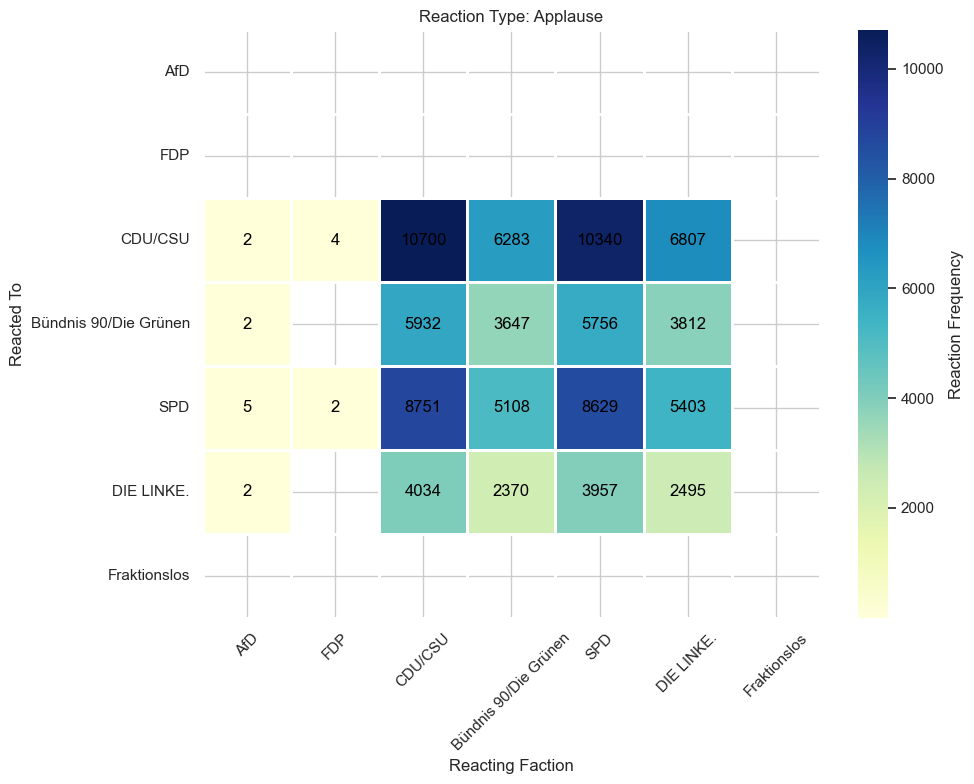

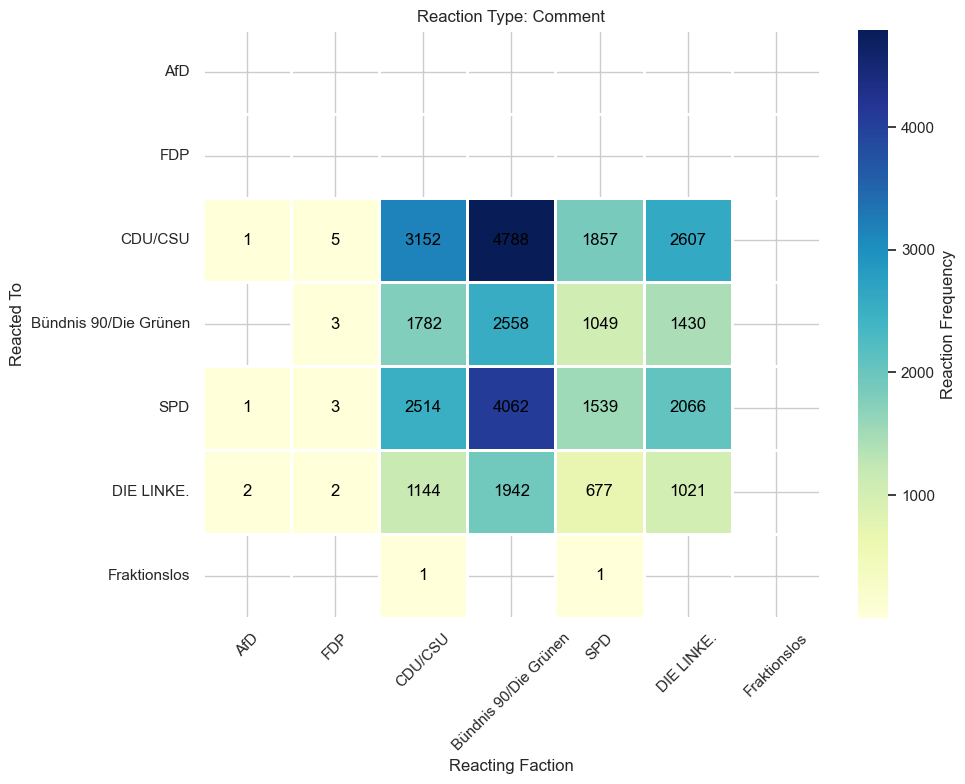

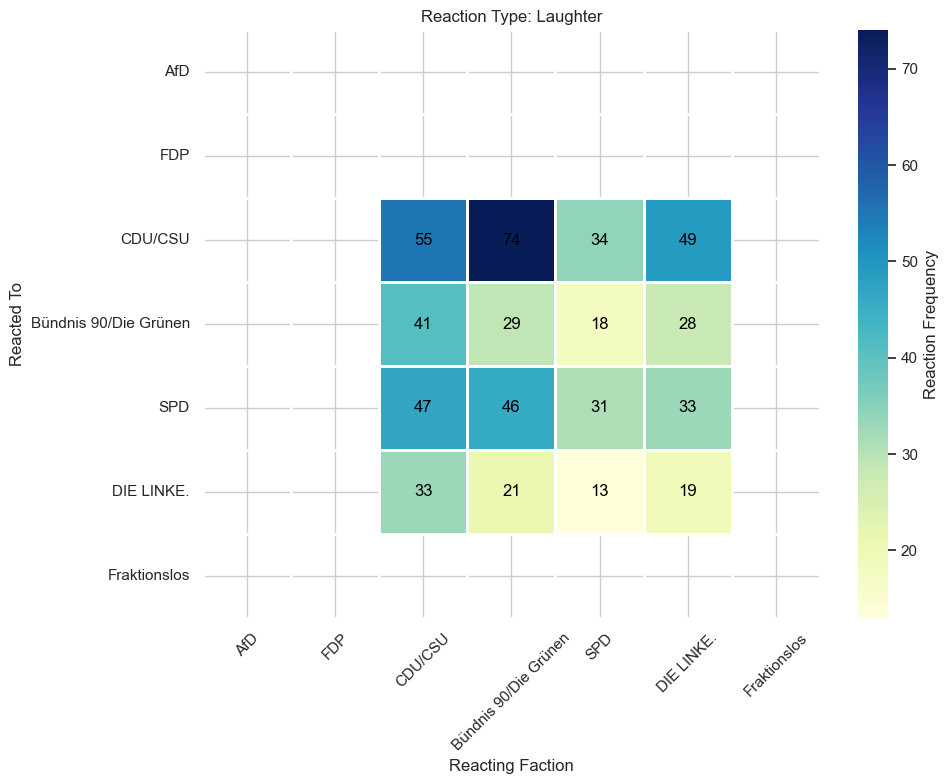

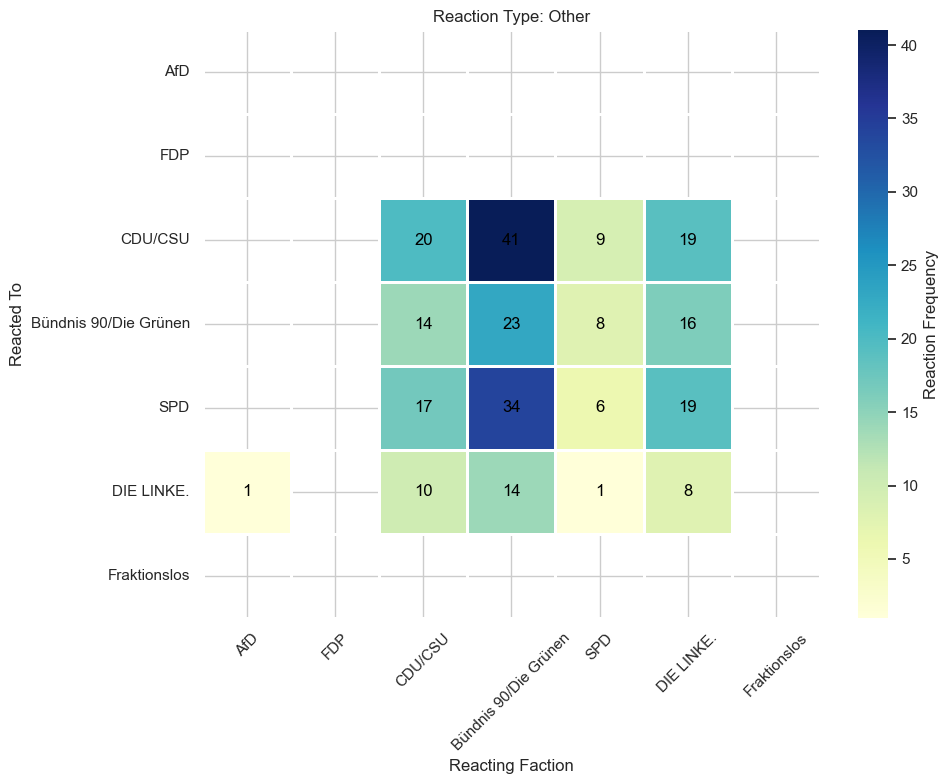

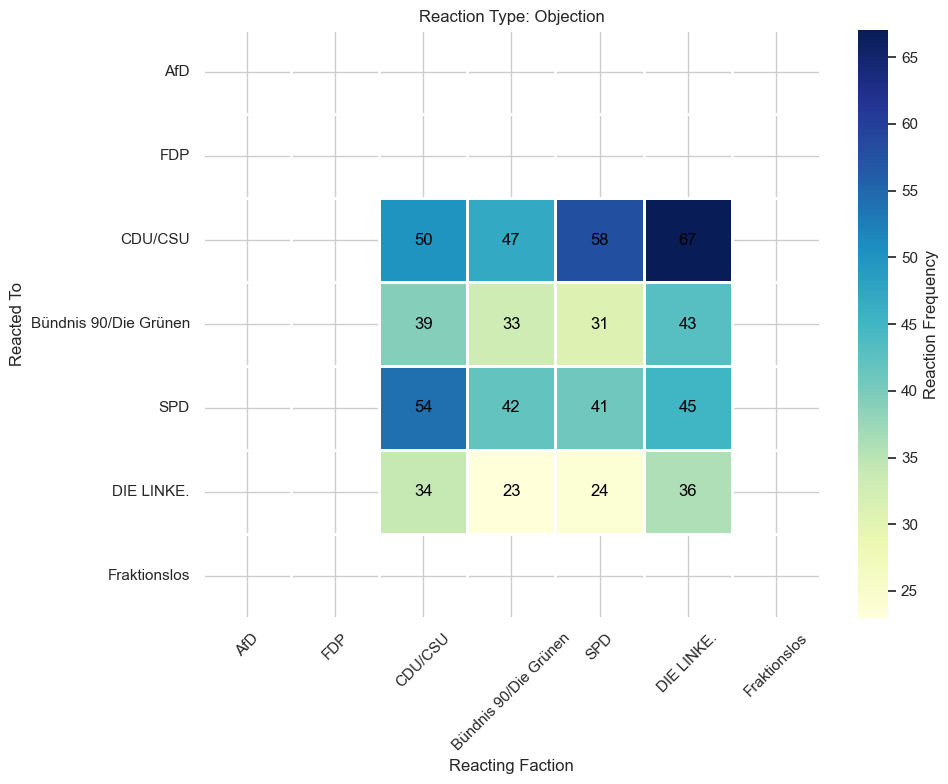

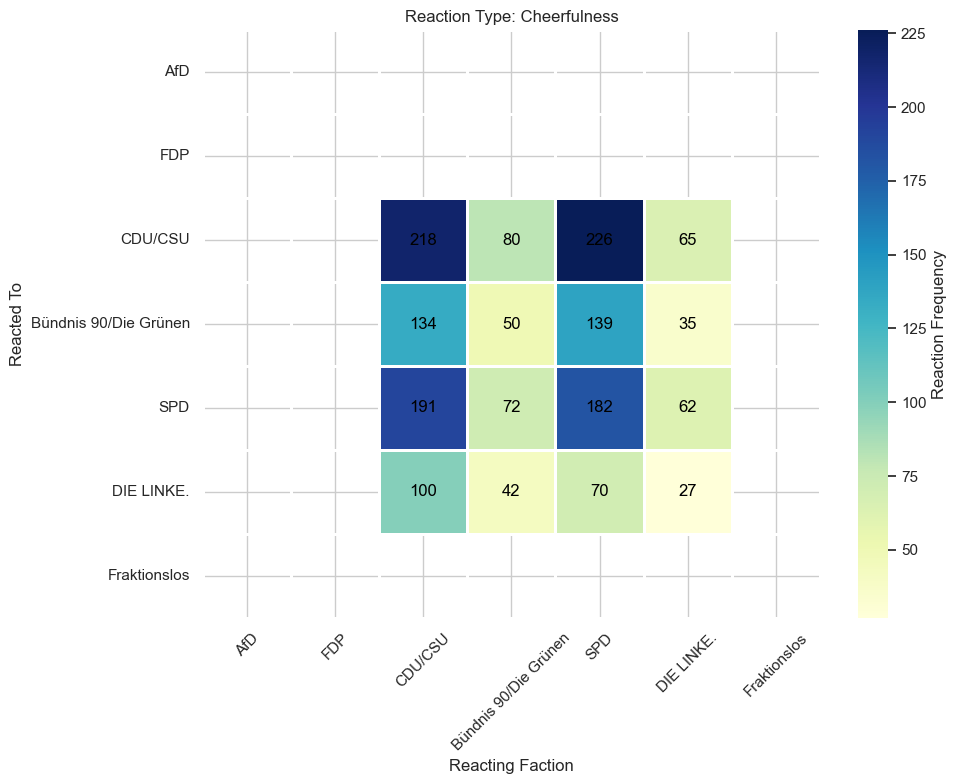

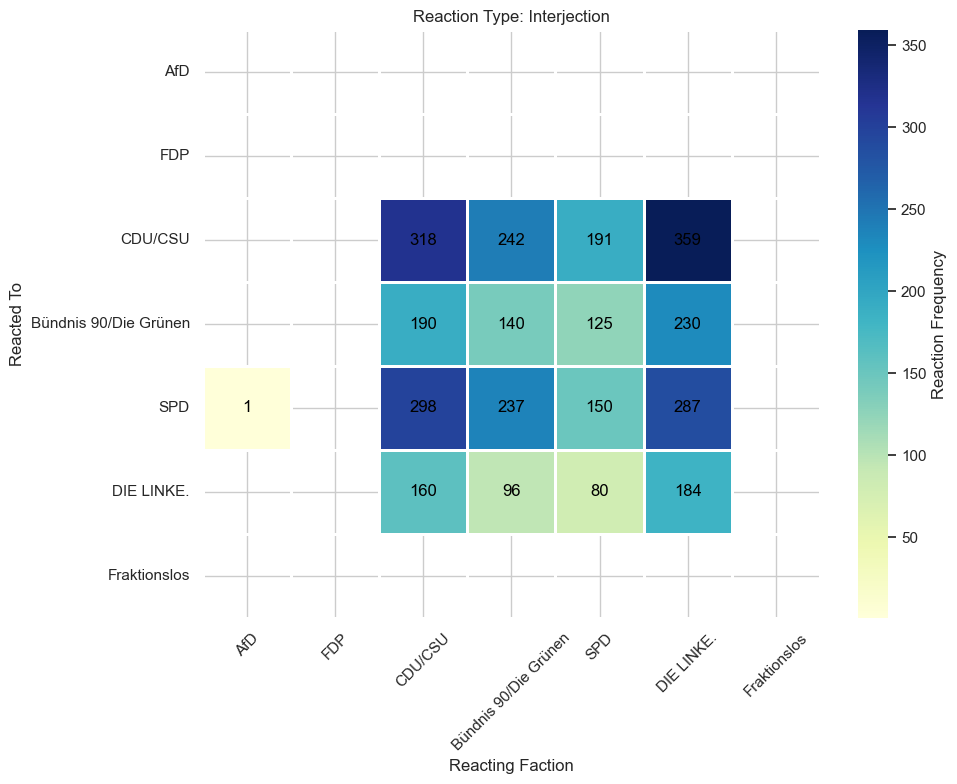

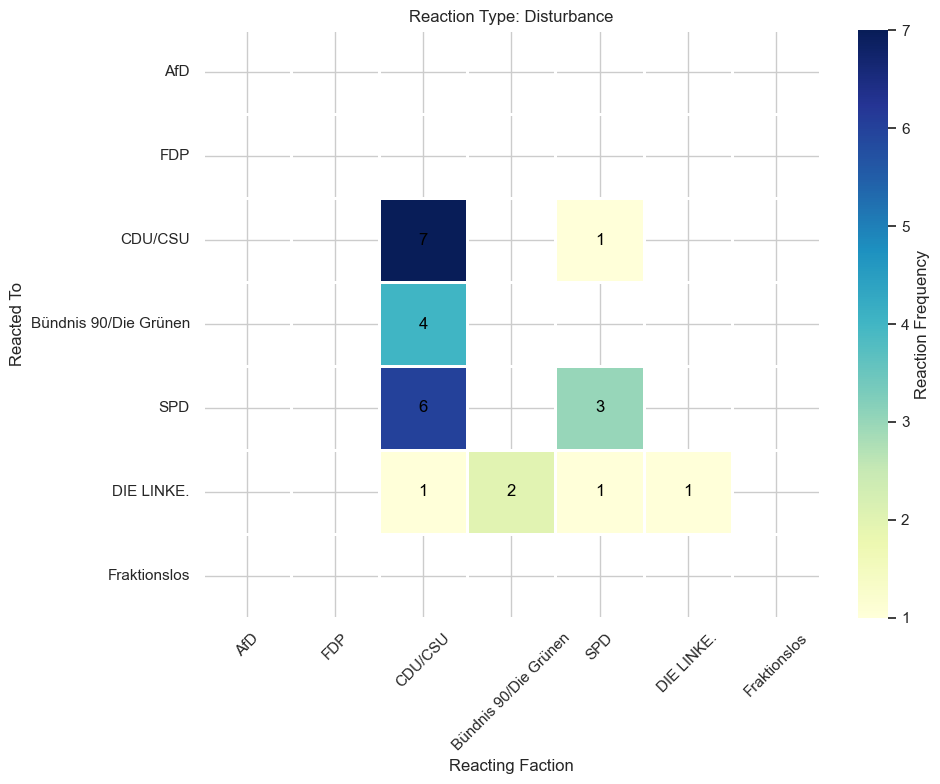

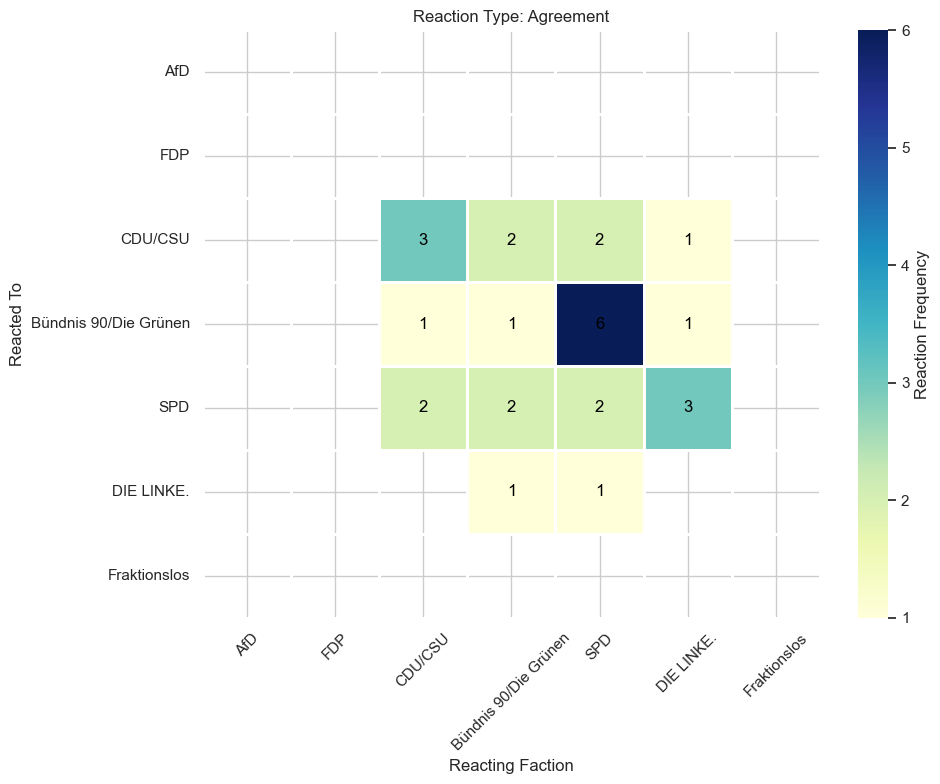

In [144]:
# Set up the plotting style for clarity
sns.set(style="whitegrid")

# Define the faction order
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Loop through each reaction matrix and plot it as a heatmap
for reaction, matrix in reaction_matrices.items():
    # Check if the matrix is non-empty before plotting
    if not matrix.empty:
        # Reindex to ensure the correct order of rows and columns
        matrix = matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
        
        # Create a mask for cells with zero values
        mask = matrix == 0

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            matrix, 
            annot=True, 
            cmap="YlGnBu", 
            fmt="d", 
            linewidths=1,       # Adjusts the thickness of the box around cells
            linecolor='white',  # Sets box color around each cell
            cbar_kws={'label': 'Reaction Frequency'}, 
            mask=mask,  # Apply the mask to hide zeros
            annot_kws={"color": "black"}  # Set annotation color for non-zero values
        )
        plt.title(f"Reaction Type: {reaction}")
        plt.xlabel("Reacting Faction")
        plt.ylabel("Reacted To")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for reaction type: {reaction}")
